### Idea 
#### search for songs that contain the name of the 5 biggest cities in each state
- Get the list of the 5 biggest cities from each state (wikipedia)
- search for occurences of the city name in the lyrics of songs (lyrics.com)
- clean up the table

In [25]:
from requests import get
import glob
import pandas as pd
from bs4 import BeautifulSoup
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from time import sleep
from random import randint

In [26]:
response = get("https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population")
html_soup = BeautifulSoup(response.text, 'html.parser')
states = html_soup.find_all("tr")

In [27]:
names_states =[]
names_cities =[]

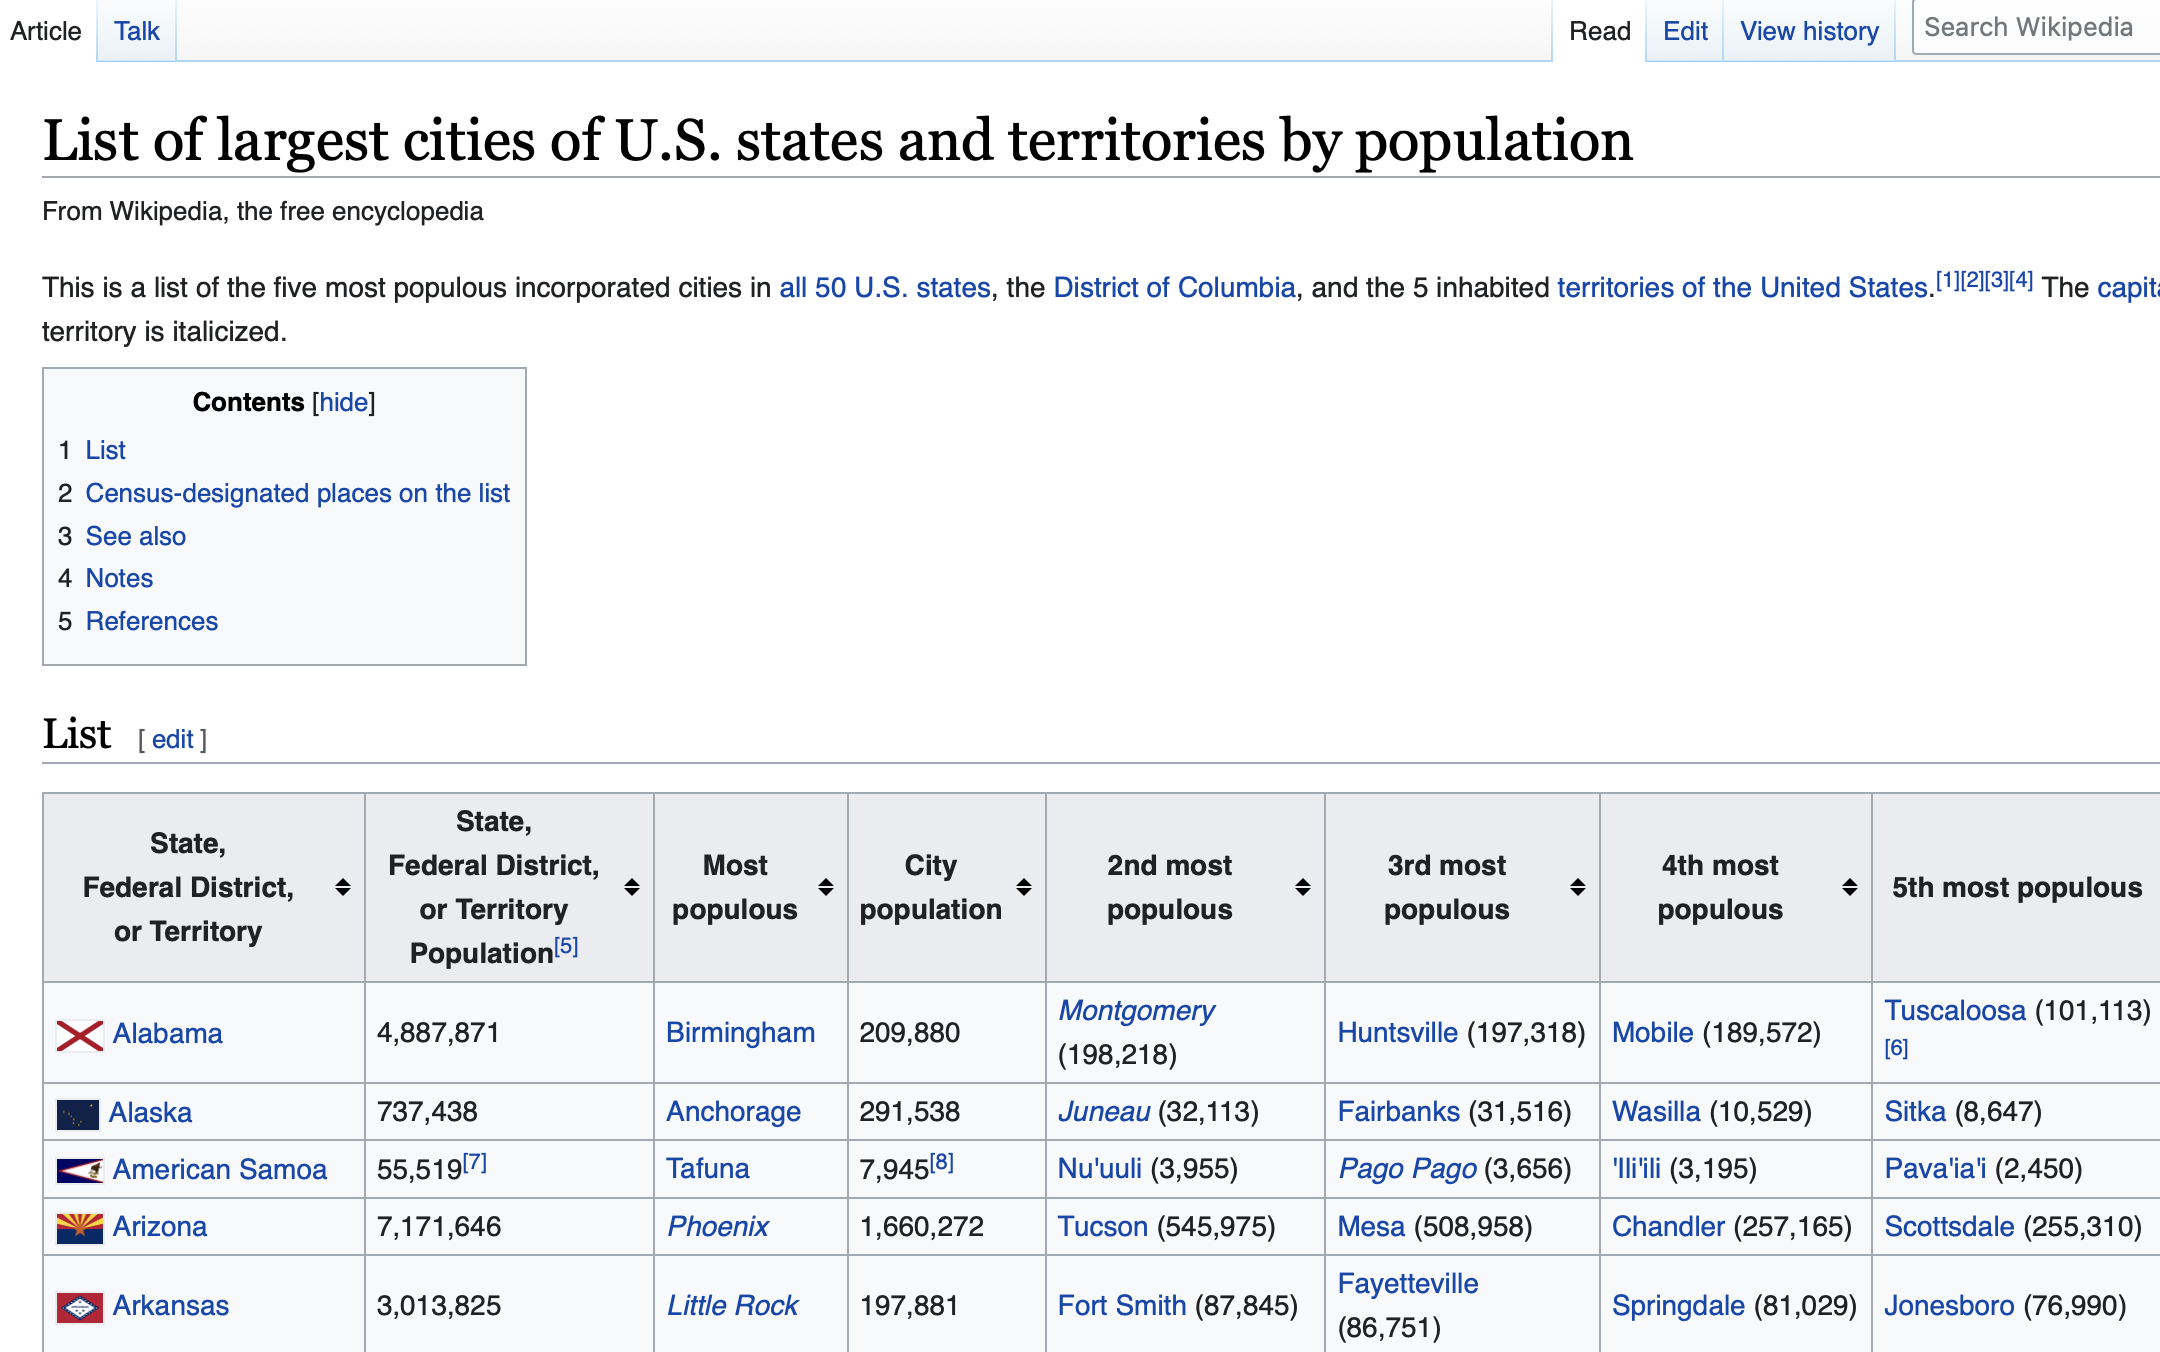

In [28]:
for state in states[1:57]:
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[0].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[2].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[4].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[5].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[6].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[7].text.split("(")[0].strip())
    
    if len(state.find_all("td")[-1])>=3:
        names_states.append(state.find_all("td")[0].text.strip())
        names_cities.append(state.find_all("td")[-1].text.split("(")[0].strip())
    

In [29]:
song_city = []
song_state = []
song_name =[]
song_artist =[]
curr_state = names_states[0]

In [30]:
def song_name_scraper(city,state):
    response = get("https://www.lyrics.com/lyrics/"+city)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    if len(html_soup.find_all("div",class_ ="pager"))>0:
        number_pages = int(html_soup.find_all("div",class_ ="pager")[-1].find_all("a")[-1].text)
    else:
        number_pages=1
    
    for page_no in range(1,number_pages+1):
        response = get("https://www.lyrics.com/lyrics/"+city+"&p="+str(page_no))
        html_soup = BeautifulSoup(response.text, 'html.parser')
        page = html_soup.find_all("div",class_ ="lyric-meta within-lyrics")
        for entry in page:
            print(city,page_no,entry.find_all("p")[0].text)
            song_city.append(city)
            song_state.append(state)
            song_name.append(entry.find_all("p")[0].text)
            song_artist.append(entry.find_all("p")[1].text)

        sleep(randint(1,2))

In [31]:
for count,city in enumerate(names_cities):
    state = names_states[count]
    if state!=curr_state:
        data = pd.DataFrame({"city":song_city,
              "state":song_state,
             "artist":song_artist,
              "song":song_name
             })
        data.drop_duplicates()
        data.to_csv("./datasets/"+str(curr_state)+".csv")
        curr_state = state
        song_city = []
        song_state = []
        song_name =[]
        song_artist =[]

    
    song_name_scraper(city,state)


Alabama 1 Sweet Home Alabama
Alabama 1 Alabama Getaway
Alabama 1 All Summer Long
Alabama 1 Art School Girl
Alabama 1 All Summer Long
Alabama 1 Big Daddy
Alabama 1 Alabama
Alabama 1 Oh Susannah
Alabama 1 Alabama
Alabama 1 Alabama
Alabama 1 Sweet Home Alabama
Alabama 1 Alabama People
Alabama 1 Alabama Song
Alabama 1 Alabama Blues
Alabama 1 Sweet Home Alabama
Alabama 1 Old Alabama
Alabama 1 Old Alabama
Alabama 1 Sweet Home Alabama
Alabama 1 The Three Great Alabama Icons
Alabama 1 Mississippi Kid
Alabama 1 Mississippi Goddam
Alabama 1 Sweet Home Alabama
Alabama 1 Mississippi Goddam [Live]
Alabama 1 Mississippi Goddam [1964 Live in New York, Stereo; Live]
Alabama 2 Mississippi Goddam
Alabama 2 Mississippi Goddam
Alabama 2 Mississippi Goddam
Alabama 2 Sweet Home Alabama
Alabama 2 Mississippi Kid
Alabama 2 Sweet Home Alabama
Alabama 2 All Summer Long
Alabama 2 Alabama
Alabama 2 Alabama Song
Alabama 2 Alabama Song
Alabama 2 Mississippi Goddam [DVD]
Alabama 2 Oh! Susannah
Alabama 2 Oh Susanna
A

Alabama 13 Red Dirt Girl
Alabama 13 Burnin' It Down
Alabama 13 Oh, Susannah
Alabama 13 Alabama Clay
Alabama 13 Oh, Susannah
Alabama 13 Oh Susannah
Alabama 13 End of Time
Alabama 13 Alabama Song
Alabama 13 Deacon Blues
Alabama 13 Oh, Susannah
Alabama 13 Interlude No.1/Play It All Night Long
Alabama 13 Play It All Night Long
Alabama 13 Her First Mistake
Alabama 13 I Have a Dream
Alabama 13 Play It All Night Long [Previously Unissued Live LP Version; Previously Unreleased Track; Bonus Track]
Alabama 13 Oh, Susannah
Alabama 13 Oh, Susannah
Alabama 13 Oh, Susannah
Alabama 13 Stars in Alabama
Alabama 13 Stars Fell on Alabama
Alabama 13 Stars Fell on Alabama
Alabama 13 Stars Fell on Alabama
Alabama 13 Stars Fell on Alabama
Alabama 13 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14 Stars Fell on Alabama
Alabama 14

Alabama 25 Drive [For Daddy Gene]
Alabama 25 The Log Train
Alabama 25 Let It Rock
Alabama 25 Midnight Train
Alabama 25 What Comes Around
Alabama 25 I Wanna Talk About Me
Alabama 25 The New Workout Plan
Alabama 25 Preachin' Blues
Alabama 25 Dixie On My Mind
Alabama 25 Dixie On My Mind
Alabama 25 Runnin' Just In Case
Alabama 25 Only One Me
Alabama 25 Let It Rock
Alabama 25 My Elusive Dreams
Alabama 25 We Shall Overcome
Alabama 25 Are You from Dixie ('Cause I'm from Dixie Too)
Alabama 25 Guitar Man
Alabama 25 We Didn't Start the Fire
Alabama 25 Formation
Alabama 25 We Didn't Start the Fire
Alabama 25 We Didn't Start the Fire
Alabama 25 All Around the World
Alabama 25 Alabama Jubilee
Alabama 25 Tar Top
Alabama 26 Toledo
Alabama 26 Long Time Gone
Alabama 26 Hairy Ass Hillbillies
Alabama 26 Protect Ya Neck (The Jump Off)
Alabama 26 Southwestward
Alabama 26 The Boogie Woogie Flying Cloud
Alabama 26 Rock & Roll
Alabama 26 A Complicated Song
Alabama 26 Big Ben Colson
Alabama 26 How Could You Be

Alabama 37 Hell No (We Ain't Alright) [Paris Remix]
Alabama 37 You Don't Mess Around with Jim [Demo Version]
Alabama 37 Row the Boat Together
Alabama 37 Throw It Up, Pt. 2
Alabama 37 Full Moon [Exclusive]
Alabama 37 Classic Rock
Alabama 37 What?
Alabama 37 You Can Thank Dixie
Alabama 37 Small Town USA
Alabama 37 Doggz II
Alabama 37 Fingernails
Alabama 37 Fingernails [Live]
Alabama 37 The Once Over Twice
Alabama 37 Shoeshine Man
Alabama 37 Patches
Alabama 37 18 Miles From Memphis
Alabama 37 Patches
Alabama 37 I've Been Around
Alabama 37 The World Is Round
Alabama 37 Fingernails
Alabama 37 My Way to You
Alabama 37 California Riots
Alabama 37 Banger (Moshpit)
Alabama 37 Homegrown Honey
Alabama 38 Don't Beat My Ass (With a Baseball Bat)
Alabama 38 State to State
Alabama 38 Real Shit
Alabama 38 Get Crunk Feat. Bo Hagon
Alabama 38 Symphony
Alabama 38 Dixie Everywhere I Go
Alabama 38 If I Was President 2016
Alabama 38 Coast 2 Coast
Alabama 38 Patches
Alabama 38 April 29, 1992 (Miami)
Alabama 

Alabama 50 Lightning
Alabama 50 Keep It All Good
Alabama 50 Rainbow
Alabama 50 Mama, Baby, Mama Let Me Jump in Your Pajamas
Alabama 50 Two Brothers With Checks (San Francisco, Harvey)
Alabama 50 Everybody Says They Want It
Alabama 50 The Possibility
Alabama 50 Roll Wit Us
Alabama 50 God Bless Alabama
Alabama 50 The Message
Alabama 50 The Madness
Alabama 50 The Madness
Alabama 50 Patches
Alabama 50 Patches
Alabama 50 Drive (For Daddy Gene)
Alabama 50 Best I Ever Had
Alabama 50 2 Many
Alabama 50 Eve of Destruction
Alabama 50 Not Legal
Alabama 50 Patches
Alabama 50 No Shipping!
Alabama 50 Tangled Up in You
Alabama 50 Real Me
Alabama 50 The Ballad of Joel & Trixie
Alabama 51 Outside Today (Freestyle)
Alabama 51 Shametown
Alabama 51 Adam and Rose
Alabama 51 Janine
Alabama 51 Fast Life
Alabama 51 50 States Of America
Alabama 51 Demeda Seng Set
Alabama 51 Country Made in Italy
Alabama 51 The Ballad of Joel & Trixie
Alabama 51 Rattlesnake
Alabama 51 Compliment Me
Alabama 51 Janine
Alabama 51 B

Birmingham 3 Birmingham
Birmingham 3 Handsome Johnny [Bonus Track]
Birmingham 3 Halfway Back to Birmingham
Birmingham 3 Down in the Valley
Birmingham 3 Boulder To Birmingham
Birmingham 3 Promised Land
Birmingham 3 Blues for Dixie
Birmingham 3 Wabash Cannonball
Birmingham 3 Wabash Cannonball
Birmingham 3 Hey Hey Hey Hey
Birmingham 3 Tuxedo Junction
Birmingham 3 Promised Land [Alternate Take 5]
Birmingham 3 Wabash Cannonball
Birmingham 3 Tuxedo Junction
Birmingham 3 Hey Hey Hey Hey
Birmingham 3 Boulder to Birmingham
Birmingham 3 Promised Land
Birmingham 3 Promised Land
Birmingham 3 If It Hadn't Been For Love
Birmingham 3 Tuxedo Junction
Birmingham 3 Black Betty
Birmingham 3 Tuxedo Junction
Birmingham 3 Wabash Cannonball
Birmingham 3 The Promised Land
Birmingham 4 Tuxedo Junction
Birmingham 4 Promised Land
Birmingham 4 Tuxedo Junction
Birmingham 4 Tuxedo Junction
Birmingham 4 Tuxedo Junction
Birmingham 4 Wabash Cannonball
Birmingham 4 Birmingham Sunday
Birmingham 4 The Promised Land
Birmi

Birmingham 14 Who Gives A... Where You From
Birmingham 14 Black Betty
Birmingham 14 Long Line of Losers
Birmingham 14 Ticket to Ride
Birmingham 14 Prayer for the Road
Birmingham 14 Prayer For the Road
Birmingham 14 Mama Papa
Birmingham 14 Sweet Home Alabama
Birmingham 14 Ronnie and Neil
Birmingham 14 The Smog
Birmingham 14 Private
Birmingham 14 Never Make Your Move Too Soon
Birmingham 14 Elusive Dreams
Birmingham 14 She's So Strange
Birmingham 14 Your Elusive Dreams
Birmingham 14 Panic [Bonus Track]
Birmingham 14 The Sands of Iwo Jima
Birmingham 14 Vengeance
Birmingham 14 Baby Center Stage
Birmingham 14 Audacity
Birmingham 14 Roll Tide
Birmingham 14 Free
Birmingham 14 Roadhouse Boogie
Birmingham 14 Alabaster
Birmingham 15 First Night
Birmingham 15 First Night
Birmingham 15 Faith
Birmingham 15 Walkin' Man
Birmingham 15 Chain Swing
Birmingham 15 One of These Days
Birmingham 15 Do America
Birmingham 15 O Little Girl from Birmingham
Birmingham 15 I'll Take You Home Again, Kathleen
Birmingh

Montgomery 5 Angels from Montgomery
Montgomery 5 Last Call
Montgomery 5 Neighborhood Drug Dealer
Montgomery 5 Gang Related
Montgomery 5 Neighborhood Drug Dealer
Montgomery 5 Mrs. Montgomery
Montgomery 5 Angel from Montgomery [The Voice Performance]
Montgomery 5 The Ride
Montgomery 5 If I Were
Montgomery 5 He Ain't the Leavin' Kind
Montgomery 5 127 Rose Avenue
Montgomery 5 Angel From Montgomery
Montgomery 5 Where Grass Won't Grow
Montgomery 5 Dixie Road
Montgomery 5 The Storms of Life
Montgomery 5 GP4
Montgomery 5 The Ride
Montgomery 5 If I Were
Montgomery 5 The Ride
Montgomery 5 The Ride
Montgomery 5 Dixie Road
Montgomery 5 Mo' Mail
Montgomery 5 The Ride
Montgomery 5 Show You Off Tonight
Montgomery 6 Pan American
Montgomery 6 Pan American
Montgomery 6 Red Light
Montgomery 6 Son of the New South
Montgomery 6 Bran Nu Swetta
Montgomery 6 Six Days on the Road
Montgomery 6 Right Hand Man
Montgomery 6 Picture Show
Montgomery 6 Pan American
Montgomery 6 Drive-In Movies and Dashboard Lights
Mo

Mobile 7 Kavi
Mobile 7 Danger 2
Mobile 7 Times Are Changing
Mobile 7 Duffer St. George
Mobile 7 Baby Love
Mobile 7 So Good So Far
Mobile 7 Baby Keep Smiling
Mobile 7 O BARACK
Mobile 7 Blues in the Night
Mobile 7 What You Got
Mobile 7 Bandits
Mobile 7 Rock Me Gently
Mobile 7 Assaut
Mobile 7 Soli Insieme
Mobile 7 T'as raison d'y croire
Mobile 7 Covidiots (Make the World Go Flat)
Mobile 7 King's Dead Freestyle
Mobile 7 Lose Yourself
Mobile 7 Blues in the Night [Bonus Track]
Mobile 7 Eight Line Poem
Mobile 7 Blues in the Night
Mobile 7 Let It Rock
Mobile 7 Let It Rock
Mobile 7 Bonny Hielan' Laddie
Mobile 8 You've Been a Good Ole Wagon
Mobile 8 Midnight in Montgomery
Mobile 8 You Can't Catch Me
Mobile 8 One Piece at a Time
Mobile 8 Blues in the Night
Mobile 8 Italian Girls
Mobile 8 Blues In The Night
Mobile 8 All Eyez on Me
Mobile 8 How Do U Want It
Mobile 8 Sweet Thing
Mobile 8 Let It Rock
Mobile 8 Rock the Bells
Mobile 8 The New Workout Plan
Mobile 8 Rock the Bells
Mobile 8 How Do U Want 

Mobile 20 Them Not Me
Mobile 20 Wonce Again Long Island
Mobile 20 Let It Rock
Mobile 20 6 Summers
Mobile 20 The Way We Get By
Mobile 20 Love King
Mobile 20 Ghosts
Mobile 20 Killer's Lullaby
Mobile 20 Love King
Mobile 20 Honky Tonk Fever
Mobile 20 Keep Dealing
Mobile 20 Dr. Buck's Letter
Mobile 20 When the War Ends
Mobile 20 Gross Chapel - GB Grenadiers
Mobile 20 Act of the Apostle
Mobile 20 Trailerhood
Mobile 20 Gritty Shaker
Mobile 20 Dr. Buck's Letter
Mobile 20 Rudebox
Mobile 20 Phone
Mobile 20 Miss U Less, See U More
Mobile 20 I Need You Tonight
Mobile 20 Bluesman
Mobile 20 Triple Up
Mobile 21 Guns N' Razors
Mobile 21 Honky Tonk Highway
Mobile 21 Only You're the One
Mobile 21 I Feel My Stuff
Mobile 21 Take a Ride (Skit)
Mobile 21 Miss U Less, See U More
Mobile 21 The Switch Up
Mobile 21 Give It to Me [DJ Kayz Remix]
Mobile 21 Smoke on the Water
Mobile 21 Smoke on the Water [Remix]
Mobile 21 King Kong
Mobile 21 Smoke on the Water [Live]
Mobile 21 Somethin' 4 Tha Mood
Mobile 21 The Mo

Mobile 36 South Bound 95
Mobile 36 Too Bad
Mobile 36 Soldier Boy
Mobile 36 Laid Back and Key Wasted
Mobile 36 Je marche seul
Mobile 36 Être le premier
Mobile 36 Smokefest 1999
Mobile 36 Waiting for a Break
Mobile 36 Still Waters
Mobile 36 Fire Makes the House Grow
Mobile 36 New Millennium
Mobile 36 Les amoureux de l'an deux mille
Mobile 36 Autumnal
Mobile 36 Hozanna
Mobile 36 Next
Mobile 36 Christmas Day
Mobile 36 Smoke on the Water [Live]
Mobile 36 Emergency 72
Mobile 36 Brilliant Day
Mobile 36 Release the Hounds
Mobile 36 Latitude
Mobile 36 Live Like the Automatics
Mobile 36 There Is No Greater Gold
Mobile 36 Blind Pilots
Mobile 37 Sunday Driver
Mobile 37 Say What
Mobile 37 Pimpology
Mobile 37 Lunch Time Cypher
Mobile 37 Blues in the Night
Mobile 37 Crestside
Mobile 37 Psyclones
Mobile 37 Lost Cities
Mobile 37 To All My Friends
Mobile 37 Hang My Teeth on Your Door
Mobile 37 Plans
Mobile 37 Je marche seul
Mobile 37 Être le premier
Mobile 37 Get a Rope
Mobile 37 The Ballad of Sean Fole

Mobile 49 ACTION
Mobile 49 Old Train
Mobile 49 Je marche seul
Mobile 49 Être le premier
Mobile 49 LOWRIDER
Mobile 49 3 Foot Tall
Mobile 49 Bad Timing
Mobile 49 Skażony
Mobile 49 Paris sens interdits
Mobile 49 Vie de pirate
Mobile 49 Shabba
Mobile 49 Les Vrais Heros
Mobile 49 LA STATION
Mobile 49 A L'AUBE
Mobile 49 Papamobile
Mobile 49 Shine
Mobile 49 College Rules
Mobile 49 Le Four
Mobile 49 Head Right [Explicit]
Mobile 49 Quand on arrive en ville
Mobile 49 Programmier Dich Neu
Mobile 49 Mourir demain
Mobile 49 Bahnhofskino
Mobile 49 Adonaïe
Mobile 50 Malade Mental
Mobile 50 MAALOX TEXAS BLUES
Mobile 50 LE GENRE FEMININ
Mobile 50 J AI LA MUSIQUE AU MOINS
Mobile 50 Bakhaw
Mobile 50 Freddos Aren't 10p
Mobile 50 Love
Mobile 50 Big Shot
Mobile 50 Smoke on the Water
Mobile 50 Smoke On The Water
Mobile 50 Smoke on the Water
Mobile 50 Smoke on the Water
Mobile 50 Rock My Fitted
Mobile 50 Walking Disaster
Mobile 50 How Love Should Be
Mobile 50 Up All Night
Mobile 50 Get Up Outta the Dirt
Mobil

Alaska 11 Blue Wing
Alaska 11 Get 'Em
Alaska 11 Rising Down
Alaska 11 Rising Down
Alaska 11 Trap or Die
Alaska 11 Another Spin
Alaska 11 Inanity Over Christmas
Alaska 11 Trap or Die [DVD]
Alaska 11 Trap or Die
Alaska 11 Chicka Boom
Alaska 11 Initiated
Alaska 11 Knocked Off
Alaska 11 In the Air
Alaska 11 Better Believe It
Alaska 11 S.D.S.
Alaska 11 S.D.S.
Alaska 11 Everybody Move
Alaska 11 Initiated
Alaska 11 Okay With Me
Alaska 11 Ghetto
Alaska 11 2 Reasons
Alaska 11 Xotic
Alaska 11 Champion
Alaska 11 2 Reasons
Alaska 12 Tony Montana
Alaska 12 That's Right
Alaska 12 Ring the Alarm
Alaska 12 Power and the Glory
Alaska 12 Cut It Out
Alaska 12 World to Me
Alaska 12 One Man Army
Alaska 12 Fancy Meeting You Here
Alaska 12 Squaws Along the Yukon
Alaska 12 Yesterday Once More
Alaska 12 Power and the Glory
Alaska 12 Anybody
Alaska 12 I've Been Everywhere
Alaska 12 One Man Army
Alaska 12 Power and the Glory
Alaska 12 Fat Chance
Alaska 12 Travelin' Man
Alaska 12 The Man on the Flying Trapeze
Ala

Alaska 25 Alfabeto Nancy
Alaska 25 Feghouli
Alaska 25 À Paris sur Mer
Alaska 25 À Paris sur Mer
Alaska 25 À Paris sur Mer
Alaska 25 Mission X
Alaska 25 Confess
Alaska 25 Charakter
Alaska 25 Oh Mon Dieu Qu Elle Est Mignonne
Alaska 25 Sheriff
Alaska 25 Ich liebe euch
Alaska 25 Persona non Grata
Alaska 25 TALK ABOUT IT
Alaska 25 Lalandia/Gremlins
Alaska 25 La complainte du phoque en Alaska
Alaska 25 1000 Netter
Alaska 25 Ça tombe pas du ciel
Alaska 25 Danse s'y
Alaska 25 Sommerland
Alaska 25 Hielo
Alaska 25 Toi et moi XXV
Alaska 25 Une histoire de monstres
Alaska 25 Loner
Alaska 25 23 tommer
Alaska 26 L'ermite
Alaska 26 Rebecca
Alaska 26 PEUT-ETRE UNE ANGINE
Alaska 26 TIC TAC
Alaska 26 Le dernier disque
Alaska 26 Hiro
Alaska 26 Lucas l'Écolo
Alaska 26 An und für dich
Alaska 26 Zga
Alaska 26 Le  souvenir de son sourire
Alaska 26 Au revoir
Alaska 26 Usain Bolt
Alaska 26 A7
Alaska 26 Homme de l'ombre
Alaska 26 La Complainte Du Phoque En Alaska
Alaska 26 RYTHM' FLOUZE
Alaska 26 UNE VIE
Alaska

Pago Pago 9 Sex Toy
Pago Pago 9 Maria Gasolina
Pago Pago 9 Chucha Que Pasa
Pago Pago 9 Para Qué Se Quiere
Pago Pago 9 Te Quiero Mucho
Pago Pago 9 Aca y Ahora
Pago Pago 9 Te Veo A La Salida
Pago Pago 9 Te gusta
Pago Pago 9 La Condena
Pago Pago 9 Fuck Gosha
Pago Pago 9 Absurdos [Ao Vivo]
Pago Pago 9 Ballena Negra
Pago Pago 9 La Vida Es Buena
Pago Pago 9 Cardinal Chic
Pago Pago 9 La Promesa
Pago Pago 9 Ami Ancor Elisa
Pago Pago 9 Para Qué Se Quiere
Pago Pago 9 Fue Una Noche de Verano
Pago Pago 9 Championa
Pago Pago 9 Todo el Año
Pago Pago 9 Crecía
Pago Pago 9 Oiça Lá ó Senhor Vinho
Pago Pago 9 Dulce Locura
Pago Pago 9 Hoy No Quiero
Pago Pago 10 Hai un Momento, Dio?
Pago Pago 10 Oiça Lá Ó Senhor Vinho
Pago Pago 10 O Que Se Quer
Pago Pago 10 Cosa C'È
Pago Pago 10 Cosa C'È
Pago Pago 10 O Que Se Quer
Pago Pago 10 Mira lo Que Son las Cosas
Pago Pago 10 Tus Mentiras
Pago Pago 10 Calibre
Pago Pago 10 Oblígame [Version Balada; Version]
Pago Pago 10 Oblígame
Pago Pago 10 Mucho Te Quiero Aka Te Qui

Pago Pago 22 Double Up
Pago Pago 22 Questa È La Mia Vita
Pago Pago 22 Timbiriche
Pago Pago 22 La Banda Timbiriche
Pago Pago 22 No Te Puedo Querer
Pago Pago 22 Acuyuye
Pago Pago 22 Tony Presidio
Pago Pago 22 Mi Vieja
Pago Pago 22 Acuyuyé
Pago Pago 22 Fiesta De Locos
Pago Pago 22 Rifles Rusos
Pago Pago 22 Cuando Sale la Luna
Pago Pago 22 Celos
Pago Pago 22 Gansta
Pago Pago 22 Confesiones de Invierno
Pago Pago 22 En la Disco
Pago Pago 22 Digo lo Que Pienso
Pago Pago 22 Formula Perfecta
Pago Pago 22 En la Disco
Pago Pago 22 Vamo Alla
Pago Pago 22 Ti Chiamero Sam (Se Suoni Bene)
Pago Pago 22 Albero di Mele
Pago Pago 22 Antonio Peralta
Pago Pago 22 Cuando Sale la Luna
Pago Pago 23 Dados Cargados
Pago Pago 23 Suena El Dembow [Remix]
Pago Pago 23 La Verdad
Pago Pago 23 Planeta Kumbia
Pago Pago 23 Oggi vendo tutto
Pago Pago 23 Amor Perdido
Pago Pago 23 Algo Que Te Debo
Pago Pago 23 Dale ParaTra
Pago Pago 23 Chacarera para Mi Vuelta
Pago Pago 23 Tu Sentida y Yo Sentido
Pago Pago 23 Soñaron
Pago 

Pago Pago 36 Serenata Chiapaneca: Flor de Niluyarilo / Luz de Luna / Para Siempre / Miénteme
Pago Pago 36 Não Resta a Menor Dúvida
Pago Pago 36 Te Metistes
Pago Pago 36 El Troquero
Pago Pago 36 El Troquero
Pago Pago 36 A José de la Tomasa
Pago Pago 36 De Lebrija a Ronda
Pago Pago 36 Nuestras Soledades
Pago Pago 36 Racistas Otários
Pago Pago 36 Tempos Difíceis
Pago Pago 36 Amigo é Pra Essas Coisas
Pago Pago 36 Una Cancion Para la Magdalena
Pago Pago 36 Mil Horas
Pago Pago 36 La Canción Más Hermosa del Mundo
Pago Pago 36 Camas Vacías
Pago Pago 36 Bombo
Pago Pago 36 Anni Amari
Pago Pago 36 Opinião
Pago Pago 36 Diez Mil
Pago Pago 36 Violetas Para Violeta [Bonus Track]
Pago Pago 36 Chicha Roja
Pago Pago 36 Maneiras
Pago Pago 36 Amor Perdido
Pago Pago 36 No Pude Quitarte las Espinas
Pago Pago 37 Jesus Chorou
Pago Pago 37 Da Ponte Pra Cá
Pago Pago 37 Doble Vida
Pago Pago 37 Llora Mi Corazón
Pago Pago 37 Mi-Rifiuto
Pago Pago 37 A Don Ata
Pago Pago 37 Hai Rotto il Catso
Pago Pago 37 A Vida É De

Pago Pago 48 Te Metiste
Pago Pago 48 Smiling Faces
Pago Pago 48 Mejor Que a Ti Me Va
Pago Pago 48 Miénteme
Pago Pago 48 Prendido Fuego
Pago Pago 48 No Me Arrepiento
Pago Pago 48 Hemoglobina
Pago Pago 48 Fuck Ranking
Pago Pago 48 Lo Tira Pa Atrás
Pago Pago 48 Gricel
Pago Pago 48 Moleque Bom / Moro Lá / Roçado
Pago Pago 48 Piérdete
Pago Pago 48 Las Viejas Chacalosas
Pago Pago 48 Cuenta de Ahorros
Pago Pago 48 Pegao
Pago Pago 48 El Señor Caro Quintero
Pago Pago 48 Cuando Sale la Luna
Pago Pago 48 Delincuente
Pago Pago 48 Ligia Escobar
Pago Pago 48 Trust Me
Pago Pago 48 Bipolar
Pago Pago 48 Ex Crush
Pago Pago 48 Bandido
Pago Pago 48 Tengan Mi Sangre
Pago Pago 49 Acostúmbrame Al Cielo
Pago Pago 49 La Alabanza
Pago Pago 49 Tempos Difíceis
Pago Pago 49 Amor Gitano
Pago Pago 49 Ojitos Rojos [En Directo; Bonus Track]
Pago Pago 49 Acostúmbrame Al Cielo
Pago Pago 49 María y José
Pago Pago 49 Si Tengo un Hermano
Pago Pago 49 Ilegales
Pago Pago 49 Ilegales
Pago Pago 49 Ahora
Pago Pago 49 Limiti
Pag

Arizona 2 Arizona
Arizona 2 Arizona
Arizona 2 AZ
Arizona 2 There Is No Arizona
Arizona 2 King Tut
Arizona 2 King Tut
Arizona 2 King Tut
Arizona 2 Voodoo Chile [Live]
Arizona 2 Voodoo Chile [Live]
Arizona 2 There Is No Arizona
Arizona 2 There Is No Arizona
Arizona 2 There Is No Arizona
Arizona 2 Sweet Arizona
Arizona 2 There Is No Arizona
Arizona 2 There Is No Arizona
Arizona 2 There Is No Arizona
Arizona 2 Get lit
Arizona 2 Arizona Star
Arizona 2 Got 'Em Covered
Arizona 2 Arizona
Arizona 2 Here with You
Arizona 2 Backhaul
Arizona 2 Arizona Bank 2
Arizona 2 Arizona (feat. AJ Perdomo)
Arizona 3 Coming Home [Bonus Track]
Arizona 3 Little Fluffy Clouds
Arizona 3 (Is Anybody Goin' to) San Antone
Arizona 3 Little Fluffy Clouds
Arizona 3 Snowfall on the Sand
Arizona 3 DANS LES PLAINES DU FAR WEST
Arizona 3 Yuma, Az
Arizona 3 Mona
Arizona 3 Little Fluffy Clouds
Arizona 3 Arizona Thursday
Arizona 3 When I Want
Arizona 3 Orion
Arizona 3 Call It All Home [Bonus Track]
Arizona 3 Little Fluffy Clou

Arizona 15 Cali Dro
Arizona 15 Gangsta Rap Made Me Do It
Arizona 15 Never Been to Spain
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Aenima
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Ragtime Cowboy Joe
Arizona 15 Tesla
Arizona 15 Tesla
Arizona 15 Adelaide
Arizona 15 Beautiful Freakshow
Arizona 15 Ça Rêve
Arizona 15 Chépakichui
Arizona 15 COUNTRILLE
Arizona 15 Ragtime Cowboy Joe
Arizona 15 No Gringo
Arizona 15 It's a Wonderful Life
Arizona 15 Cancion 187
Arizona 15 Get Back
Arizona 15 Man With the Big Hat
Arizona 16 Shotgun and a Pistol
Arizona 16 The Ballad of Ira Hayes
Arizona 16 Mule Train
Arizona 16 Ghetto Cowboy
Arizona 16 Freelove [DJ Muggs Remix]
Arizona 16 Phony Rappers
Arizona 16 Route 66
Arizona 16 Who Want Some
Arizona 16 Thug Mentality
Arizona 16 My Heart Cries for You
Arizona 16 Cowboy Beat
Arizona 16 Phony Rappers
Arizona 16 Dead City
Arizona 16 You Alone
Arizo

Arizona 27 Navajo Wrangler
Arizona 27 Guerrillas in the Mist
Arizona 27 No Place Like You
Arizona 27 Percy Faith
Arizona 27 Cowboy-Rocker
Arizona 27 Fake Names
Arizona 27 Route 66
Arizona 27 This Cowboy's Hat
Arizona 27 Denim Demon
Arizona 27 Stolen Land
Arizona 27 Arkansas Blues
Arizona 27 Everett Ruess
Arizona 27 Rhode Island Is Famous for You
Arizona 27 Wild Horses
Arizona 27 There Dey Go
Arizona 27 World Be Free
Arizona 27 Throw Ya City Up
Arizona 27 Woof Woof
Arizona 27 Get Back
Arizona 27 Thuggin'
Arizona 27 First Stop, Arizona [Dialogue]
Arizona 27 Stolen Land
Arizona 27 Seawall
Arizona 27 Fraction of a Man
Arizona 28 Third and Seneca
Arizona 28 Don't Rush Me [Bonus Track]
Arizona 28 Halls
Arizona 28 Ot
Arizona 28 Close to Home
Arizona 28 My Elusive Mind
Arizona 28 Want Ads Two
Arizona 28 Back When We Were Gods
Arizona 28 Halls
Arizona 28 Life Goes On
Arizona 28 Pull Up
Arizona 28 Time Travel
Arizona 28 Last Run
Arizona 28 Speedway at Nazareth [Live]
Arizona 28 Forfeit.
Arizona 

Arizona 40 Mon Vieux Joe
Arizona 40 Love Hunter
Arizona 40 Arizona
Arizona 40 Lo Spazio Vuoto
Arizona 40 Arizona Blues
Arizona 40 The Routine
Arizona 40 PUT IT DOWN
Arizona 40 El Moro de Tepehuanes
Arizona 40 Aire Americà
Arizona 40 Rhode Island Is Famous for You
Arizona 40 Rhode Island Is Famous for You
Arizona 40 Rhode Island Is Famous for You
Arizona 40 Ride With Us
Arizona 40 Fuck Royal T
Arizona 40 Bustin' Off Shots
Arizona 40 Rhode Island Is Famous for You A.K.A. Coney Island
Arizona 40 Mis Tres Animales
Arizona 40 Money & Power
Arizona 40 The Four Corners
Arizona 40 Last Man Standing
Arizona 40 Gravity
Arizona 40 Tank
Arizona 40 Latino Pt. 2
Arizona 40 Stoïque
Arizona 41 Spectrum
Arizona 41 Mark of the Beast II (R.S.V.)
Arizona 41 Get Back
Arizona 41 Rhode Island Is Famous for You
Arizona 41 Super 8
Arizona 41 Autant que toi
Arizona 41 E Fatt O' Giallo
Arizona 41 Best Spot in the House
Arizona 41 Cool Car
Arizona 41 47 Deep
Arizona 41 El Representante
Arizona 41 El 7 [Versión To

Phoenix 11 By the Time I Get to Phoenix
Phoenix 11 Sail Away
Phoenix 11 Diamonds From Sierra Leone [Remix]
Phoenix 11 Stays in Mexico
Phoenix 11 Little Egypt (Ying Yang)
Phoenix 11 Ballad of Ira Hayes
Phoenix 11 By the Time I Get to Phoenix
Phoenix 11 Little Egypt (Ying Yang) [Alternate Version]
Phoenix 11 No Spare Parts
Phoenix 11 Little Egypt (Ying-Yang)
Phoenix 11 A View To A Kill
Phoenix 11 I Don't Know What to Say to You
Phoenix 11 We
Phoenix 11 Saddle Tramp [Bonus Track]
Phoenix 11 Carlisle Wheeling [First Recorded Version]
Phoenix 11 A View To A Kill
Phoenix 11 Monto
Phoenix 11 Who Do I Know in Dallas
Phoenix 11 Saddle Tramp
Phoenix 11 Ride Cowboy Ride
Phoenix 11 A Wednesday Car
Phoenix 11 The Ballad of Ira Hayes
Phoenix 11 By the Time I Get to Phoenix
Phoenix 11 By the Time I Get to Phoenix
Phoenix 12 Ride Wit Me
Phoenix 12 The Ballad of Ira Hayes
Phoenix 12 Rio [US Album Remix]
Phoenix 12 FEEL.
Phoenix 12 By the Time I Get to Phoenix
Phoenix 12 Ride Wit Me
Phoenix 12 Saddle Tr

Phoenix 24 Space Is Gonna Do Me Good
Phoenix 24 Even the Man in the Moon Is Crying
Phoenix 24 Call the Shots
Phoenix 24 Our Lady of the Shooting Stars
Phoenix 24 The Burning Red
Phoenix 24 Afraid of Sunrise
Phoenix 24 Kadu Flyer
Phoenix 24 How You Went So Far
Phoenix 24 Revolution Song
Phoenix 24 In the Presence of My Enemies
Phoenix 24 Together
Phoenix 24 Ascendancy
Phoenix 24 Phoenix [From Wishbone Ash]
Phoenix 24 World Be Free
Phoenix 24 Brave New World
Phoenix 24 Darky
Phoenix 24 Dangerous Mindz
Phoenix 24 Hope
Phoenix 24 The Seus [Infadels Remix]
Phoenix 24 Call the Shots
Phoenix 24 Fall Apart with You
Phoenix 24 Brave New World
Phoenix 24 Fryerstarter
Phoenix 24 Ancient Dreams
Phoenix 25 Inglorious
Phoenix 25 Holly the Hustle
Phoenix 25 Broken
Phoenix 25 Johnny D
Phoenix 25 We Know You Suck
Phoenix 25 Oroborus
Phoenix 25 (the Night the Sky Cried) Tears of Fire
Phoenix 25 Funny Word
Phoenix 25 Hallelujah [Bonus Track]
Phoenix 25 Boomerang
Phoenix 25 Same Old Me
Phoenix 25 Perfect


Phoenix 38 Descent to the Netherworld
Phoenix 38 Roam
Phoenix 38 A View to a Kill
Phoenix 38 A View to Kill
Phoenix 38 Aarhus
Phoenix 38 City of Dope
Phoenix 38 Begotten (Through Blood and Flame)
Phoenix 38 Iodic Rain
Phoenix 38 What Did I Do Wrong
Phoenix 38 Good Life
Phoenix 38 Monotony
Phoenix 38 Going for a Walk With a Line
Phoenix 38 Lay Down
Phoenix 38 Rehab
Phoenix 38 Phoenix
Phoenix 38 Savage Messiah
Phoenix 38 Battle Axe Exclusive
Phoenix 38 Northern Lights
Phoenix 38 Nothing Sacred
Phoenix 38 Nothing Sacred
Phoenix 38 Fires of the Judas Blood
Phoenix 38 New York Girls
Phoenix 38 New Age Messiah
Phoenix 38 Wait in a Line
Phoenix 39 Empty Texas
Phoenix 39 Sum Of Our Parts
Phoenix 39 Song for a River
Phoenix 39 Running With the Devil
Phoenix 39 My Town
Phoenix 39 The Aerospaceage Inferno
Phoenix 39 Smells Like Queer Spirit
Phoenix 39 This Girl
Phoenix 39 Cold Missouri Waters
Phoenix 39 She's Kerosene
Phoenix 39 Shakira
Phoenix 39 Weakness
Phoenix 39 When Abyss Winds Return
Phoen

Tucson 4 Get Back
Tucson 4 Get Back
Tucson 4 Thumbelina
Tucson 4 Closer [T-Mass Remix]
Tucson 4 Closer [R3hab Remix]
Tucson 4 Closer [Tokyo Remix]
Tucson 4 Salty Dog
Tucson 4 Joy
Tucson 4 Never Do That [DVD]
Tucson 4 Criminology 2.5
Tucson 4 Closer
Tucson 4 Closer
Tucson 4 Get Back
Tucson 4 Closer
Tucson 4 You Can Sleep While I Drive
Tucson 4 Get Back
Tucson 4 The Painted Desert
Tucson 4 Concerto in X Minor
Tucson 4 Crime in the Desert
Tucson 4 The Road to Gila Bend
Tucson 4 Get Back
Tucson 4 Tucson, Arizona (Gazette)
Tucson 4 Oh Rosie
Tucson 4 Trouble's Lament
Tucson 5 Got 'Em Covered
Tucson 5 Come on Down
Tucson 5 Oh My Stars
Tucson 5 For You
Tucson 5 Love
Tucson 5 Ride With Me
Tucson 5 Relax, Enjoy Yourself
Tucson 5 Get Back
Tucson 5 Under African Skies
Tucson 5 Get Back
Tucson 5 Remember 2 Forget
Tucson 5 Playboys
Tucson 5 Toxic Love
Tucson 5 You Can Sleep When I Drive
Tucson 5 How Far to Waco
Tucson 5 Old Black Dawning
Tucson 5 99 Days
Tucson 5 I'm the Only One
Tucson 5 Preacher's

Mesa 11 Gloria
Mesa 11 Electric Slide
Mesa 11 Virando A Mesa
Mesa 11 Foragido
Mesa 11 O Fora
Mesa 11 Exagerado [Ao Vivo em Campo Grande]
Mesa 11 Mesa Ao Lado
Mesa 11 COMO CELSO JÁ DIZIA
Mesa 11 Única Distância
Mesa 11 Camarote
Mesa 11 Háblame Claro
Mesa 11 Tas Claro
Mesa 11 Simplesmente
Mesa 11 Entra No Clima
Mesa 11 Whisky Doble
Mesa 11 Tarará
Mesa 11 Los Míos Ganan [Remix]
Mesa 11 Rapariga Digital
Mesa 11 Jalo
Mesa 11 Feitio De Paixão [Ao Vivo]
Mesa 11 La Calle Sigue
Mesa 11 Esqueci Você
Mesa 11 #Ysya2020 Vol. 1 - Una de Dos
Mesa 11 Café Para Dos
Mesa 12 O Fora
Mesa 12 Tranquilizado
Mesa 12 Yo He Nacío
Mesa 12 A Esa
Mesa 12 Electric Slide
Mesa 12 Hasta Aquí Te Fui Fiel
Mesa 12 Hasta Aqui Te Fui Fiel
Mesa 12 Heaven Is Waiting
Mesa 12 Casa Do Pai
Mesa 12 Esqueci Você
Mesa 12 O Cara Da Rádio
Mesa 12 Malicia de Mulher
Mesa 12 Tropa Inteligente [Ao Vivo Em Goiânia]
Mesa 12 Que Seas Mi Hogar
Mesa 12 Mexe Que É Bom
Mesa 12 Kriolu
Mesa 12 Mexe Que É Bom
Mesa 12 Mexe Que É Bom
Mesa 12 Entra N

Mesa 26 GDBD
Mesa 26 Vivir Sin Ella
Mesa 26 Vono Tinto
Mesa 26 Tambien las Mujeres Pueden
Mesa 26 Por Debajo de la Mesa
Mesa 26 No Digas Nada y Baila
Mesa 26 Se La Ví
Mesa 26 Me Dejó De Engañar
Mesa 26 As Vezes Deus Exagera
Mesa 26 Cabaré
Mesa 26 La Luz
Mesa 26 Você Nao Entende Nada / Cotidiano [Ao Vivo Na Bahia]
Mesa 26 Te Está Doliendo
Mesa 26 Last Call
Mesa 26 LA CANCIÓN
Mesa 26 Throw Your Hands Up [Dancar Kuduro]
Mesa 26 El Abrigo
Mesa 26 Amarte Es
Mesa 26 No Puedo Más
Mesa 26 Mi México de Ayer
Mesa 26 To Magazaki Tis Kardias Mou
Mesa 26 Estoy por Ti
Mesa 26 Meu Menino Jesus
Mesa 26 Mainha Me Ensinou
Mesa 27 Cancion en Harapos
Mesa 27 Era de Amar
Mesa 27 El de la Gorra 27
Mesa 27 E Agora Nós?
Mesa 27 Convite Para Nascer De Novo
Mesa 27 Desculpe, Mas Eu Vou Chorar
Mesa 27 Dói Sem Tanto
Mesa 27 Dengo Nego
Mesa 27 Melhor Saída
Mesa 27 Buteco Raiz [Buteco Raiz (Só As Derramadas)]
Mesa 27 Som da Caixinha (JBL) [Aperte o Play! (Ao Vivo)]
Mesa 27 Cátia Catchaça
Mesa 27 Última Cerveja
Mesa

Mesa 40 Riquiquí
Mesa 40 Las Simples Cosas
Mesa 40 Monster Ballads
Mesa 40 No Se Va a Llamar Mi Amor
Mesa 40 Bruxa Amarela
Mesa 40 Un Poquito Más
Mesa 40 Hormiga Brava
Mesa 40 No Hago Otra Cosa Que Pensar en Ti
Mesa 40 Amor Proibido
Mesa 40 Cumplir un Año Menos
Mesa 40 Millonario de Amor
Mesa 40 Todo Por Servir Se Acaba
Mesa 40 Di Que Si, Di Que No
Mesa 40 Reggaeton Ton
Mesa 40 Por Si Acaso Volvieras
Mesa 40 Porta Entreaberta
Mesa 40 Si Tú No Estás
Mesa 40 Camina Solo
Mesa 40 En Cada Diciembre
Mesa 40 A Punto de Estallar
Mesa 40 Ponte N'Klabe
Mesa 40 Da Cor Brasileira
Mesa 40 Bonito el Sentimiento del Amor
Mesa 40 El Santo Prieto [Version Norteña]
Mesa 41 Amon Rá E O Cavalo de Tróia
Mesa 41 El Santo Prieto
Mesa 41 Esta Noche Habrá una Fiesta
Mesa 41 Esto Es Perreo
Mesa 41 Del Principio Hasta El Fin
Mesa 41 Sol Tapado
Mesa 41 La Navidad de los Pobres
Mesa 41 Coyote
Mesa 41 La Belleza
Mesa 41 Fangal
Mesa 41 Liar
Mesa 41 Por Culpa de Quien?
Mesa 41 La Belleza
Mesa 41 Por Que Será?
Mesa 41

Mesa 55 Cuando los Hijos Se Van
Mesa 55 Esperando
Mesa 55 Paisaje
Mesa 55 Janis
Mesa 55 Nadie
Mesa 55 Margarita
Mesa 55 Las Simples Cosas / Toda una Vida
Mesa 55 De Pies a Cabeza
Mesa 55 Mix Feliciano: Paso la Vida Pensando / Por Que Te Tengo Que Olvidar
Mesa 55 Te Vuelvo a Elegir
Mesa 55 Baila
Mesa 55 La Luz
Mesa 55 Comer de Cristo
Mesa 55 Mírame
Mesa 55 Tarde de Galletas
Mesa 55 Se Prende la Luz
Mesa 55 In Action
Mesa 55 Tesoro, tesoro
Mesa 55 Naranjas de Valencia
Mesa 55 La Procesión
Mesa 55 Forjandome un Cigarro
Mesa 55 La Sustancia
Mesa 55 Ceniza
Mesa 55 Filetron
Mesa 56 El Gerente
Mesa 56 La Culpa
Mesa 56 Consumo en Exceso
Mesa 56 SurNorte
Mesa 56 La Veo Bailar
Mesa 56 Luz
Mesa 56 Buenos y Malos
Mesa 56 La Cancion
Mesa 56 Destrucción
Mesa 56 Yo Perreo Sola
Mesa 56 Dispendio
Mesa 56 Homenaje
Mesa 56 Volvere / Movidito Movidito
Mesa 56 Alas
Mesa 56 Violines
Mesa 56 No Sabe Mal
Mesa 56 Pan de Cada Día
Mesa 56 Los Plebes Atrevidos
Mesa 56 Dame Mi Canción
Mesa 56 Mi Cristo Roto
Mesa 5

Mesa 70 El  Plomín
Mesa 70 Y Por Lo Pronto
Mesa 70 La  Vida del Rey (El Playa)
Mesa 70 La Mesa Puesta
Mesa 70 Tío Alberto
Mesa 70 Qué Pude Haber Hecho por Ti
Mesa 70 Si No Hubiera Nacido (Mai Nata)
Mesa 70 Baby, Amo Você
Mesa 70 Amor de Mãe
Mesa 70 Eu Voltei Pra Casa
Mesa 70 Curo tus Labios
Mesa 70 Atmósfera
Mesa 70 El Capitán del Barco
Mesa 70 El Corrido del Snap (aka el Snap)
Mesa 70 El Otro
Mesa 70 Que Se Vaya Contigo
Mesa 70 Pa Mí [Remix]
Mesa 70 Do Fogo Que Segue a Queimar
Mesa 70 VÁMONOS
Mesa 70 Aldeia
Mesa 70 Dízima Periódica / Fêmea Alpha [Studio]
Mesa 70 Bis [Studio]
Mesa 70 Cansada de Ouvir Desculpas [Studio]
Mesa 70 O CÉU É O MEU LUGAR
Mesa 71 Se Va Viral
Mesa 71 Aprovecha El Tiempo
Mesa 71 HÁ UM LUGAR PRA MIM
Mesa 71 Antisocial
Mesa 71 Women Make the World Go 'Round
Mesa 71 Entonces Tu Si
Mesa 71 Se Te Vais
Mesa 71 Fondin de Pedro Mendoza
Mesa 71 Libertango
Mesa 71 Extraños
Mesa 71 Vingança
Mesa 71 Meu Querido Corto Maltese
Mesa 71 Eu te procuro
Mesa 71 Aún Quieres
Mesa 71 

Mesa 85 Baila
Mesa 85 Canta Conmigo
Mesa 85 Segredos
Mesa 85 Sinaloense Es El Joven
Mesa 85 No Te Cuesta Nada
Mesa 85 Revivendo Emoções [Ao Vivo]
Mesa 85 Abrir la Puerta
Mesa 85 Ela Diz
Mesa 85 Vacilão
Mesa 85 Un Peso
Mesa 85 Eu Sou O Rap
Mesa 85 DBG Cypher
Mesa 85 A Dormir Juntitos
Mesa 85 La Webcam
Mesa 85 Kojone Eh
Mesa 85 Salmo 1
Mesa 85 Salmo 23
Mesa 85 Samba
Mesa 85 Beibs On The Trap [Spanish Version]
Mesa 85 Octubre
Mesa 85 Vem Cá Vê Se Não Sou Eu
Mesa 85 Desconsidera
Mesa 85 Dónde Estabas Tú
Mesa 85 Trovão [Ao Vivo]
Mesa 86 A Vida Não Tá Fácil Pra Ninguém
Mesa 86 Carne de Canon
Mesa 86 É Dia De Beber De Novo
Mesa 86 Desiguais
Mesa 86 Pai
Mesa 86 Carry On
Mesa 86 El Igloo
Mesa 86 Lejos
Mesa 86 Nuestro Invierno
Mesa 86 Desconhecido
Mesa 86 Natikillah
Mesa 86 Malas Palabras
Mesa 86 Querer
Mesa 86 CSM 323 El Niño de Coria
Mesa 86 Moleque Bom / Moro Lá / Roçado
Mesa 86 El G-Funk Desde el Barrio
Mesa 86 Están Sonando Campanas
Mesa 86 De Azul Celeste
Mesa 86 300 Anos / Não Tem Pra Nin

Mesa 100 Soy Tu Superhéroe
Mesa 100 Chiquilin de Bachin
Mesa 100 El De Michoacán
Mesa 100 Berlín
Mesa 100 Ex Do Seu Atual
Mesa 100 Por Verte Sonreir
Mesa 100 Como Dioses Pequeños
Mesa 100 Nuestro Huésped Sea Usted
Mesa 100 Por Mais Três Horas [(Ao Vivo)]
Mesa 100 El Güero Verdugo
Mesa 100 Antes de Que te Vayas
Mesa 100 Bendiciones
Mesa 100 En Mi Vida
Mesa 100 Apenas Te Conozco
Mesa 100 10% [Ao Vivo]
Mesa 100 Nao Leve Flores
Mesa 100 Desci A Ladeira
Mesa 100 Mulher Feita
Mesa 100 Canção Pro Tempo
Mesa 100 To' El Mundo Mata Gente
Mesa 100 Te Lo Digo A Ti
Mesa 100 Mais Que Um Amigo
Mesa 100 Se Tiver Coragem
Mesa 100 Compartilhar
Mesa 101 Deixa Pra Depois
Mesa 101 Las Cuatro y Diez [En Directo]
Mesa 101 Meu Coração Surtou
Mesa 101 El Chuyin
Mesa 101 Camina
Mesa 101 La Belleza
Mesa 101 Brasil Bom De Boca
Mesa 101 Cada Vez
Mesa 101 La  Ultima Batalla
Mesa 101 Super Estrella
Mesa 101 La Entrevista
Mesa 101 Aquel Día
Mesa 101 Culpame a Mi
Mesa 101 Los Jefes De La Clika
Mesa 101 Mi Manera De Pe

Arkansas 6 Tain't So, Honey, Tain't So
Arkansas 6 Moonshine Whiskey
Arkansas 6 What'd I Say
Arkansas 6 What'd I Say
Arkansas 6 Long Line Rider
Arkansas 6 What'd I Say
Arkansas 6 There Dey Go
Arkansas 6 Bout It, Bout It II
Arkansas 6 Late Night Radio
Arkansas 6 Moonshine Whiskey
Arkansas 6 Rollin' Stone
Arkansas 6 Timber
Arkansas 6 Amsterdam
Arkansas 6 Dry County Girl
Arkansas 6 My Lucille
Arkansas 6 On the Trail
Arkansas 6 Bout It, Bout It II
Arkansas 6 Dink's Song [Demo Version]
Arkansas 6 How Ya Do Dat
Arkansas 6 I'm Bout It, Bout It
Arkansas 6 Late Nite Radio
Arkansas 6 A Feather's Not A Bird
Arkansas 6 Thicker Than Blood
Arkansas 6 What'd I Say
Arkansas 7 Christmas as I Knew It [DVD]
Arkansas 7 Out Last Night
Arkansas 7 Buttermilk John
Arkansas 7 Sis Draper
Arkansas 7 Belle Starr
Arkansas 7 Belle Starr [DVD]
Arkansas 7 I'm Bout It, Bout It
Arkansas 7 What'd I Say [Boogaloo]
Arkansas 7 Cinco de Mayo in Memphis
Arkansas 7 What'd I Say
Arkansas 7 Banks of the Arkansas
Arkansas 7 Intro

Arkansas 18 Shawty
Arkansas 18 New Store No. 2
Arkansas 18 Thick Georgia Woman
Arkansas 18 Achy Breaky Heart
Little Rock 1 Little T & A
Little Rock 1 Little T & A
Little Rock 1 Sweet Little Rock and Roller
Little Rock 1 Sound Check
Little Rock 1 Sweet Little Rock and Roller
Little Rock 1 Little Rock
Little Rock 1 Sweet Little Rock & Roller
Little Rock 1 Doctor Jekyll
Little Rock 1 I Hear Little Rock Calling
Little Rock 1 Sweet Little Rock and Roller
Little Rock 1 Show Me
Little Rock 1 Rock & Roll Queen ...
Little Rock 1 Sweet Little Rock & Roller
Little Rock 1 Sweet Little Rock 'n' Roller
Little Rock 1 Rock Your Heart Out
Little Rock 1 Rock & Roll Queen ... [Innen Version]
Little Rock 1 Sweet Little Rock 'N' Roller
Little Rock 1 Sweet Little Rock & Roller
Little Rock 1 Little Rock
Little Rock 1 Little Rock 'n' Roller
Little Rock 1 Sweet Little Rock 'N' Roller
Little Rock 1 Show Me
Little Rock 1 Little Past Little Rock [DVD]
Little Rock 1 Rockin' Little Angel
Little Rock 2 A Little Past

Little Rock 11 Gonna
Little Rock 11 Out of Town B's
Little Rock 11 Rock Me Baby
Little Rock 11 Rock Steady
Little Rock 11 Stock Market Blues
Little Rock 11 Don't Ever Play Yourself
Little Rock 11 I Wish I Could Have Been There
Little Rock 11 Asylums in Jerusalem
Little Rock 11 Party Girl (St. Tropez)
Little Rock 11 Cotton Fields
Little Rock 11 Stones
Little Rock 11 What's That Sound
Little Rock 11 Up in Arkansas
Little Rock 11 My Washington Woman
Little Rock 11 Deeper
Little Rock 11 Tonight My Baby's Coming Home
Little Rock 11 Overnight Sensation
Little Rock 11 Cotton Fields
Little Rock 11 Don't Look Any Further
Little Rock 11 Don't Look Any Further
Little Rock 11 Don't Look Any Further
Little Rock 11 Don't Look Any Further
Little Rock 11 You Know What It Is
Little Rock 11 Rock N Roll
Little Rock 12 Wish I Could Have Been There
Little Rock 12 Can't Truss It
Little Rock 12 Soundtrack to the Streets
Little Rock 12 Sunkissed Child
Little Rock 12 Million Miles
Little Rock 12 Wild Honey [Mo

Little Rock 22 Untitled Track
Little Rock 22 Say What
Little Rock 22 The Jam
Little Rock 22 John Brown
Little Rock 22 The Jam
Little Rock 22 Say What
Little Rock 22 Give It To Ya
Little Rock 22 Posh Boys
Little Rock 22 Fuck You to the Track
Little Rock 22 Rockin' All Night
Little Rock 22 Pretty Thing
Little Rock 22 Jump in the Line
Little Rock 22 Tonight I'm Gonna Rock You Tonight
Little Rock 22 Jesse, AR
Little Rock 22 Pretty Mess
Little Rock 22 Dead By Day
Little Rock 22 The Pretty Things Are Going to Hell [Edit]
Little Rock 22 Rockin' Robin
Little Rock 22 The House Rules
Little Rock 22 Little Miss Can't Be Wrong
Little Rock 22 Little Miss Can't Be Wrong
Little Rock 22 American Band
Little Rock 22 We're an American Band
Little Rock 22 Losing My Way
Little Rock 23 Rock Dis Funky Joint
Little Rock 23 To da Break of Dawn
Little Rock 23 To Da Break of Dawn
Little Rock 23 Intro
Little Rock 23 Keep On
Little Rock 23 Intro
Little Rock 23 (You Can Still) Rock in America
Little Rock 23 (You C

Little Rock 33 Pirate Radio
Little Rock 33 White Lines [Album Version]
Little Rock 33 White Lines
Little Rock 33 Baby and a Sewing Machine
Little Rock 33 Sexy Ways
Little Rock 33 Money Becomes King
Little Rock 33 Ring the Alarm
Little Rock 33 Phantom (Acoustic)
Little Rock 33 Yell for Me
Little Rock 33 Tippy Toeing
Little Rock 33 Alone in the Street
Little Rock 33 Find You
Little Rock 33 Who Are You When I'm Not Looking
Little Rock 33 White Lines
Little Rock 33 White Lines
Little Rock 33 White Lines
Little Rock 33 Love My Life
Little Rock 33 Love My Life
Little Rock 33 Kill-It Kid Rag
Little Rock 33 Pretty Thing
Little Rock 33 Row Row Row Your Boat
Little Rock 33 Rock This Town
Little Rock 33 Bluebird
Little Rock 33 Rock Problems
Little Rock 34 Phone Tag
Little Rock 34 Dixie Lily
Little Rock 34 That's My Kind of Night
Little Rock 34 That's My Kind Of Night
Little Rock 34 That's My Kind of Night
Little Rock 34 White Lines
Little Rock 34 White Lines
Little Rock 34 White Lines
Little Rock

Little Rock 44 Havana Moon
Little Rock 44 I-95
Little Rock 44 Slow
Little Rock 44 Jailhouse Rock
Little Rock 44 Well, Well, Well
Little Rock 44 Bluish Boy
Little Rock 44 Willing a Destruction Onto Humanity
Little Rock 44 Time to Make the Dough Nutz
Little Rock 44 Ready To Rock
Little Rock 44 Biomechanic Man
Little Rock 44 Jailhouse Rock
Little Rock 44 Rock Around With Ollie Vee
Little Rock 44 Rock Around With Ollie Vee [Alternate Version; Bonus Track; Version]
Little Rock 44 Rock Me Baby
Little Rock 44 Rock Me Baby [Mono Version]
Little Rock 44 Rock Around with Ollie Vee
Little Rock 44 Round and Round
Little Rock 44 Futurama
Little Rock 44 Run 4 Cover
Little Rock 44 The Cool
Little Rock 44 The Cool
Little Rock 44 Give It Away
Little Rock 44 Step Off
Little Rock 44 Step Off
Little Rock 45 Rock This Town
Little Rock 45 Rock Me
Little Rock 45 Watching You
Little Rock 45 Freeze to Me
Little Rock 45 Beware Do We Go
Little Rock 45 Ashley
Little Rock 45 Jailhouse Rock
Little Rock 45 Play With

Little Rock 55 Jailhouse Rock
Little Rock 55 Rock the Spot
Little Rock 55 Rock N' a Hard Place
Little Rock 55 Rock This Town
Little Rock 55 Where Is My Mind?
Little Rock 55 Morocco
Little Rock 55 Rockin' Robin
Little Rock 55 Dance to the Bop
Little Rock 55 Dance to the Bop
Little Rock 55 (I Want A) Rock and Roll Guitar
Little Rock 55 Rockstar
Little Rock 55 Takes a Lot to Rock You
Little Rock 55 Up Against the Wall Riddim
Little Rock 55 Jailhouse Rock
Little Rock 55 Where is My Mind?
Little Rock 55 Where Is My Mind
Little Rock 55 Bus Stops
Little Rock 55 Time Stood Still
Little Rock 55 Where is My Mind
Little Rock 55 Good Thing
Little Rock 55 Absorb
Little Rock 55 Feeling of Love
Little Rock 55 In a Night Like This
Little Rock 55 Where Is My Mind
Little Rock 57 バイバイ Old Rock'n Roll
Little Rock 57 Hold On
Little Rock 57 Jailhouse Rock
Little Rock 57 Body Rock
Little Rock 57 Your Sister Can't Twist (But She Can Rock 'n Roll)
Little Rock 57 Rock N Roll
Little Rock 57 Rock Me Tonight
Littl

Little Rock 67 Crazy for You
Little Rock 67 The Seed 2.0
Little Rock 67 Crazy for You
Little Rock 67 Voices of Freedom
Little Rock 67 Voices of Freedom
Little Rock 67 Bad For Good
Little Rock 67 Bad For Good - Jim Steinman
Little Rock 67 It's a Party [Acappella Dirty]
Little Rock 67 Little Sài Gòn
Little Rock 67 Mofo
Little Rock 67 8th Wonder
Little Rock 67 Move It On Over
Little Rock 67 Move It On Over
Little Rock 67 Move It on Over
Little Rock 67 Move It on Over
Little Rock 67 Detroit Thang
Little Rock 67 City Pavement
Little Rock 67 Rock Wit'cha
Little Rock 67 It's a Party
Little Rock 67 It's a Party
Little Rock 67 Undead
Little Rock 67 Go On
Little Rock 67 Crazy Little Thing Called Love
Little Rock 67 Shake
Little Rock 68 Pressure
Little Rock 68 Dance to the Bop
Little Rock 68 Dance To the Bop
Little Rock 68 Where This Flower Blooms
Little Rock 68 Safe + Sound
Little Rock 68 Higher
Little Rock 68 I Don't **** With You
Little Rock 68 Bad for Good
Little Rock 68 Rock and Roll Never F

Little Rock 78 Cold Outside
Little Rock 78 Wonderful World
Little Rock 78 Queen of the Hop
Little Rock 78 Lovergirl
Little Rock 78 That's My Little Suzie
Little Rock 78 Paranoid
Little Rock 78 I Do It for Hip Hop
Little Rock 78 Rock & Roll Queen
Little Rock 78 Third Rock from Her Thumb
Little Rock 78 I Will Survive
Little Rock 78 Debbie
Little Rock 78 Debbie
Little Rock 78 Little Lover
Little Rock 78 Little Lover
Little Rock 78 Yes Sir, I Will
Little Rock 78 Bottle to the Baby
Little Rock 78 Bottle to the Baby
Little Rock 78 The Hand That Rocks the Cradle
Little Rock 78 D-Elite
Little Rock 78 All Star
Little Rock 78 Rock & Roll Never Forgets
Little Rock 78 Hot, Hot, Hot
Little Rock 78 It Won't Stop
Little Rock 78 It Won't Stop
Little Rock 79 A  Little Love
Little Rock 79 Cramp Ya Style
Little Rock 79 Sister's Coming Home /Down at the Corner Beer Joint
Little Rock 79 Sister's Coming Home [Live]
Little Rock 79 Guitar Talk
Little Rock 79 Notorious Thugs
Little Rock 79 Sikamikanico
Little 

Little Rock 89 Tallahassee Lassie
Little Rock 89 Rock My Shit [Bonus Track]
Little Rock 89 Jailhouse Rock
Little Rock 89 Modern Times Rock'n'roll
Little Rock 89 Living in Fast Forward
Little Rock 89 Beauty and a Beat
Little Rock 89 Let's Pop
Little Rock 89 On The Run
Little Rock 89 Let's Pop
Little Rock 89 A Little to Loose
Little Rock 89 Somethin' Like Dis
Little Rock 89 Sweetchops
Little Rock 89 Once Bitten Twice Shy
Little Rock 89 Lollipop
Little Rock 89 The Harp Jam
Little Rock 89 Money Clip
Little Rock 89 Money Clip
Little Rock 89 The Twist
Little Rock 89 All My Friends Say
Little Rock 89 Lovergirl
Little Rock 89 Life Is a Rock (But the Radio Rolled Me)
Little Rock 89 Saturday Night
Little Rock 89 Ooh My Head
Little Rock 89 Ooh! My Head
Little Rock 90 Wings of the Morning [Album Version]
Little Rock 90 The Twist
Little Rock 90 City
Little Rock 90 Knowing Too Little
Little Rock 90 What Would You Do
Little Rock 90 What Would You Do?
Little Rock 90 Representin' 93
Little Rock 90 Polk

Little Rock 100 Focus
Little Rock 100 The Dark
Little Rock 100 Straight Down the Line
Little Rock 100 Ego Rock
Little Rock 100 We Don't Play Around
Little Rock 100 Ether
Little Rock 100 Hey Y'all
Little Rock 100 Obsessed With Aretha
Little Rock 100 Rock N Roll Hoochie Coo
Little Rock 100 Superfly
Little Rock 100 Old School
Little Rock 100 Berklee Rocks
Little Rock 100 Rock the World
Little Rock 100 Jolson Medley: Sonny Boy/My Mammy/Rock-A-Bye Your Baby with a ...
Little Rock 100 Get Rhythm
Little Rock 100 Get Rhythm [Live]
Little Rock 100 Dreaming of a Little Cabin
Little Rock 100 Get Rhythm
Little Rock 100 Do You Really Like It
Little Rock 100 Crazy Little Thing Called Love
Little Rock 100 Crazy Little Thing Called Love
Little Rock 100 Crazy Little Thing Called Love
Little Rock 100 B Boys Will B Boys
Little Rock 100 Measure Up
Little Rock 101 Dream Small
Little Rock 101 The Five Deadly Venoms
Little Rock 101 No Escape
Little Rock 101 Enemies With Me
Little Rock 101 Victim of the Ghett

Little Rock 111 The Best of Both Worlds
Little Rock 111 Anything Goes
Little Rock 111 Get It Together
Little Rock 111 Kenny Parker Show 2001
Little Rock 111 It Ain't the Meat (It's the Motion)
Little Rock 111 Wanna Rock and Roll
Little Rock 111 Rock N Roll Will Break Your Heart
Little Rock 111 Livin' Proof
Little Rock 111 A Little Somethin'
Little Rock 111 Put Like That
Little Rock 111 Enjoy da Ride
Little Rock 111 Charms Alarm
Little Rock 111 From Ruthless 2 Death Row (Do We All Part)
Little Rock 111 Da Bomb
Little Rock 111 We'll Be There
Little Rock 111 Can't Say No
Little Rock 111 Little Bit of Rain
Little Rock 111 Respect Power
Little Rock 111 Goldrush
Little Rock 111 Roll Over Beethoven
Little Rock 111 Poverty Hill
Little Rock 111 I Didn't Know My Mother Had a Son Like Me
Little Rock 111 Going Back To Harlan
Little Rock 111 Down at the Corner Beer Joint
Little Rock 112 Clash City Rockers [DVD; Bonus Track]
Little Rock 112 Dead or Alive
Little Rock 112 Goin' Back To Harlan
Little R

Little Rock 122 She Needs Rock N Roll
Little Rock 122 Party Wasn't Over
Little Rock 122 Saturday Night
Little Rock 122 Headz Ain't Redee
Little Rock 122 My Team
Little Rock 122 My Team
Little Rock 122 It's on Tonight
Little Rock 122 Swervin'
Little Rock 122 Excitable Boy
Little Rock 122 I'm About to Get Her
Little Rock 122 Do It 2 Me
Little Rock 122 The Watcher 2
Little Rock 122 Hangover Due
Little Rock 122 All Good
Little Rock 122 Somebody's Gotta Feel This
Little Rock 122 Come on Baby and Take a Walk
Little Rock 122 Roving Gangster (Rollin')
Little Rock 122 Oooh!
Little Rock 122 Holloween on Military Street
Little Rock 122 Evolution Revolution Love
Little Rock 122 Girls
Little Rock 122 Kilo Remix [Mix]
Little Rock 122 All Around
Little Rock 122 Little Bit O' Soul
Little Rock 124 Sexting
Little Rock 124 The Bull
Little Rock 124 Broke Boy Ambitions
Little Rock 124 Champion Requiem
Little Rock 124 Champion Requiem
Little Rock 124 I Had a Dream
Little Rock 124 Shout It Out
Little Rock 12

Little Rock 134 Supersonic
Little Rock 134 Pager
Little Rock 134 Do You Remember?
Little Rock 134 Nail in the Coffin
Little Rock 134 Shake Señora
Little Rock 134 Bezerk
Little Rock 134 Nail in the Coffin
Little Rock 134 My Songs
Little Rock 134 Kiss of Death
Little Rock 134 Dummy Man
Little Rock 134 Who's Playin Games?
Little Rock 134 No Glory
Little Rock 134 Who's Playin' Games?
Little Rock 134 As I Em
Little Rock 134 Gang's All Here
Little Rock 134 Matter of Time [Remix]
Little Rock 134 Sleep, Australia, Sleep
Little Rock 134 Down '71 (The Getaway)
Little Rock 134 Groove a Little
Little Rock 134 Demonstration
Little Rock 134 I Love Jazz
Little Rock 134 Demonstration
Little Rock 134 Chip Away the Stone
Little Rock 134 Chip Away the Stone
Little Rock 135 Kitty Kat [Homecoming Live]
Little Rock 135 Drive On
Little Rock 135 Heroes
Little Rock 135 Drive On
Little Rock 135 John Henry
Little Rock 135 Lollipop
Little Rock 135 No Sleep Till Brooklyn
Little Rock 135 Snappin' & Trappin'
Little 

Little Rock 145 I Do It for Hip Hop
Little Rock 145 Run [Bonus Track]
Little Rock 145 Rivers of Blood
Little Rock 145 Name Me King
Little Rock 145 What's Your Fantasy
Little Rock 145 Nice [Bonus Track]
Little Rock 145 The Truth
Little Rock 145 Raise up off These Nuts
Little Rock 145 Drive On
Little Rock 145 Magazine
Little Rock 145 I Need a Girl (To Bella)
Little Rock 145 Ghetto Ballin
Little Rock 145 Ghetto Child
Little Rock 145 On the Floor [Radio Edit-No Rap]
Little Rock 145 Big Bidness
Little Rock 145 Hip Hop
Little Rock 145 Heroes
Little Rock 145 Ride or Die
Little Rock 145 Good Rockin'
Little Rock 145 Never Changing Love
Little Rock 145 Anything Goes
Little Rock 145 Anything Goes
Little Rock 145 Sex, Drugs and Rock & Roll [Studio Demo]
Little Rock 145 Anything Goes
Little Rock 146 Heavy Rope
Little Rock 146 Wanna Be High
Little Rock 146 World Tour
Little Rock 146 Heavy Rope
Little Rock 146 Anything Goes
Little Rock 146 Feeling Me
Little Rock 146 Theme Song
Little Rock 146 Brushy 

Little Rock 156 Straighten It Out
Little Rock 156 On and On
Little Rock 156 World of Entertainment (Woe Is Me)
Little Rock 156 Trains, Planes and Automobiles
Little Rock 156 Read My Lips
Little Rock 156 Aunt Dot
Little Rock 156 Aunt Dot
Little Rock 156 '97 Bonnie & Clyde
Little Rock 156 Rockstar
Little Rock 156 Sum Shit I Wrote
Little Rock 156 Slam Pit
Little Rock 156 We Got What You Want
Little Rock 156 'Til the Dawn
Little Rock 156 'Til the Dawn
Little Rock 156 Love of My Life (An Ode to Hip Hop)
Little Rock 156 I'll Be Around
Little Rock 156 I'll Be Around
Little Rock 156 Situation
Little Rock 156 Niggaz Wanna Act
Little Rock 156 Heavy Metal Poisoning
Little Rock 156 Offshore
Little Rock 156 Best Day Ever
Little Rock 156 Presidential MC
Little Rock 156 My Soul [Amended LP Version; Version]
Little Rock 157 On Fire
Little Rock 157 BDE Bonus [Best Day Ever]
Little Rock 157 Leviathan
Little Rock 157 Neva CHange
Little Rock 157 Idle on Parade
Little Rock 157 Shield of Abraham
Little Rock

Little Rock 167 Bow Wow (That's My Name)
Little Rock 167 The Great Titanic
Little Rock 167 Baby Hold Me Close
Little Rock 167 Pee Wee's Place
Little Rock 167 Golden Gate
Little Rock 167 Pretty Baby
Little Rock 167 The Lucky Song
Little Rock 167 Let Me Clear My Throat
Little Rock 167 The Red Headed Stranger
Little Rock 167 Crazy Talk
Little Rock 167 Pretty Baby
Little Rock 167 Payday
Little Rock 167 Sister's Coming Home
Little Rock 167 Pretty Baby [Previously Unreleased Track]
Little Rock 167 Oklahoma Nights
Little Rock 167 No Time [Single Version]
Little Rock 167 Miss U
Little Rock 167 Sally Simpson
Little Rock 167 Tryin 2 Do Something
Little Rock 167 Quality
Little Rock 167 Arthur McBride
Little Rock 167 I'd Do Anything for Love (But I Won't Do That)
Little Rock 167 White Dove
Little Rock 167 Fever
Little Rock 168 Ravers
Little Rock 168 I'd Do Anything For Love [But I Won't Do That; Album Version]
Little Rock 168 Reaction
Little Rock 168 Roll the Bones
Little Rock 168 I'd Do Anything 

Little Rock 178 I'd Do Anything for Love (But I Won't Do That)
Little Rock 178 Crash Into Me
Little Rock 178 House Shoes
Little Rock 178 Crash Into Me
Little Rock 178 Dizzy Miss Lizzy
Little Rock 178 Really
Little Rock 178 You Wear It Well
Little Rock 178 Red-Headed Stranger
Little Rock 178 One of Us
Little Rock 178 The Red-Headed Stranger
Little Rock 178 Gone
Little Rock 178 Definitive
Little Rock 178 Rock Me 'Til I Die
Little Rock 178 In This Shit
Little Rock 178 Rock
Little Rock 178 Anywhere You Wanna Go
Little Rock 178 To the Club
Little Rock 178 Ready or Not [Video Edit; Edit]
Little Rock 178 Drink You Away
Little Rock 178 Centre
Little Rock 178 Third Warning
Little Rock 178 Come on In
Little Rock 178 Western Ways
Little Rock 178 Steaks 'n Shrimp
Little Rock 179 Promoter (Of Earthbound Causes)
Little Rock 179 Drink It, Drug It
Little Rock 179 Filth Friends Unite
Little Rock 179 Tune into My Wave
Little Rock 179 Pit Bull Fights
Little Rock 179 Pit Bull Fights
Little Rock 179 He Com

Little Rock 191 After Party
Little Rock 191 Standing on the Rock
Little Rock 191 Anything goes
Little Rock 191 Intro
Little Rock 191 Aging Orange
Little Rock 191 Rock Dreams
Little Rock 191 ROCKSTAR P
Little Rock 191 Be Mine
Little Rock 191 Just Having Some Fun
Little Rock 191 No Plan B
Little Rock 191 Let It Roll
Little Rock 191 Black Tears
Little Rock 191 Off the Hillbilly Hook
Little Rock 191 M.A.D.
Little Rock 191 Sum Pimped Out
Little Rock 191 Anything Goes
Little Rock 191 (Don't You Mess Around With) My Little Sister
Little Rock 191 When It's Reckless
Little Rock 191 Don't Touch My Radio
Little Rock 191 Dance Apocalyptic
Little Rock 191 Rainy Dayz
Little Rock 191 Borough Check
Little Rock 191 Undeniable
Little Rock 191 Dance Apocalyptic
Little Rock 192 Six Degrees
Little Rock 192 Six Degrees
Little Rock 192 Accomplishments
Little Rock 192 Mornin' Rise
Little Rock 192 I Know My History
Little Rock 192 P.O.P
Little Rock 192 Untitled Track
Little Rock 192 SlaughterMouse
Little Rock 

Little Rock 202 On That Jack
Little Rock 202 Gaston Ave
Little Rock 202 Liquid Swords [DVD; Live]
Little Rock 202 Odd Couple
Little Rock 202 This Instant
Little Rock 202 The Cover of the Rolling Stone
Little Rock 202 No Smoking in the House
Little Rock 202 Little People
Little Rock 202 Hunt Me Down
Little Rock 202 Swimming Today
Little Rock 202 Saturday Night
Little Rock 202 Caught in the Crowd (feat. Marta España & Dominic Choi)
Little Rock 202 Erika
Little Rock 202 Mr. Stranger
Little Rock 202 Stuck
Little Rock 202 Mr. Stranger
Little Rock 202 Counted Me Out
Little Rock 202 Freaky a$$
Little Rock 202 Go Big or Go Home
Little Rock 202 Run
Little Rock 202 Baby Got Back
Little Rock 202 Cry Little Sister
Little Rock 202 Baby Got Back
Little Rock 202 Baby Got Back
Little Rock 203 Baby Got Back
Little Rock 203 The Bridge
Little Rock 203 Chess
Little Rock 203 Dig
Little Rock 203 Force of Nature
Little Rock 203 Deeper
Little Rock 203 Bill's at the Door
Little Rock 203 Deliver
Little Rock 203

Little Rock 213 Track_1
Little Rock 213 The Central
Little Rock 213 Crooked Letter
Little Rock 213 The Bridge
Little Rock 213 Maintain
Little Rock 213 Life
Little Rock 213 More
Little Rock 213 Adrenaline
Little Rock 213 Yerk 30
Little Rock 213 Raise Your Glass
Little Rock 213 No Woman, No Cry (Bossa version)
Little Rock 213 Sexy Santa
Little Rock 213 Mommy's Little Girl
Little Rock 213 Texas
Little Rock 213 When I'm Gone
Little Rock 213 Long Haired Country Boy
Little Rock 213 Sing For The Moment
Little Rock 213 The Way I Am
Little Rock 213 Shade Tree (Fix-It-Man)
Little Rock 213 It Ain't Easy
Little Rock 213 Stranded on Death Row
Little Rock 213 Ain't No Nigga
Little Rock 213 Regrets
Little Rock 213 Perfection
Little Rock 214 The Bare Necessities
Little Rock 214 Bling Blang
Little Rock 214 Run Rudolph Run
Little Rock 214 Poor Boy
Little Rock 214 Lawyers, Guns and Money
Little Rock 214 Medley: Blue Rock Montana/Red Headed Stranger
Little Rock 214 Greystone Chapel
Little Rock 214 B.O.B.


Little Rock 224 Troublesome 96
Little Rock 224 God Bless The Dead
Little Rock 224 On Through the Night
Little Rock 224 What's Beef
Little Rock 224 Very Special
Little Rock 224 Go Ahead in the Rain
Little Rock 224 Freedom '90
Little Rock 224 The Whole World
Little Rock 224 Gorgeous
Little Rock 224 Me And My Friends
Little Rock 224 I'd Do Anything For Love (But I Won't Do That)
Little Rock 224 Boyz-N-The Hood
Little Rock 224 Keep It Hid
Little Rock 224 The One and Only
Little Rock 224 Troublesome '96
Little Rock 224 Sweet Jane
Little Rock 224 Nosetalgia
Little Rock 224 Player's Ball
Little Rock 224 Grandma's Garden
Little Rock 224 Juke Box Baby
Little Rock 224 Juke Box Baby
Little Rock 224 Last Day
Little Rock 224 What's Beef?
Little Rock 224 Freaky Tales
Little Rock 225 Long Haired Country Boy
Little Rock 225 Long Haired Country Boy
Little Rock 225 W.P.A.
Little Rock 225 To Live and Die in L.A.
Little Rock 225 The Whole World
Little Rock 225 All in the Name of Rock 'N' Roll [Alternate V

Little Rock 235 Your Only Friends Are Make Believe
Little Rock 235 Kill That Noise
Little Rock 235 Got It Bad Y'all
Little Rock 235 The Dude
Little Rock 235 That Staten Island Shit
Little Rock 235 Camouflage Unicorns
Little Rock 235 Kevin Weaver
Little Rock 235 Mad Izm
Little Rock 235 Lightworks
Little Rock 235 End of the Road
Little Rock 235 Up in Smoke
Little Rock 235 Be Careful
Little Rock 235 Sexbox
Little Rock 235 Bracket Basher
Little Rock 235 I'm Hungry
Little Rock 235 Twin Towers
Little Rock 235 Walk on Water
Little Rock 235 I'd Do Anything For Love (But I Won't Do That)
Little Rock 235 Dive
Little Rock 235 Ride Wit Me
Little Rock 235 Bernadette
Little Rock 235 Lawyers, Guns and Money
Little Rock 235 Pegasus
Little Rock 235 Peep Game
Little Rock 236 Guess Who's Back
Little Rock 236 Living Legends, Pt. 2
Little Rock 236 Jazz (We've Got) [Re-Recording; Version]
Little Rock 236 Bia' Bia'
Little Rock 236 Railroad Song [Live; Previously Unreleased Track; Bonus Track]
Little Rock 236

Little Rock 246 Believe
Little Rock 246 Tippin' Point
Little Rock 246 Ride or Die
Little Rock 246 Lifestyle of a Thug
Little Rock 246 Story
Little Rock 246 The One
Little Rock 246 Heart & Soul (Live)
Little Rock 246 Ama/Home
Little Rock 246 Da Heart
Little Rock 246 More Than an Intro
Little Rock 246 Heart to Stone
Little Rock 246 The Ugly Duckling
Little Rock 246 28 Days of Blackness
Little Rock 246 Vinyl
Little Rock 246 Fake Friends
Little Rock 246 Oscurità
Little Rock 246 Anything Goes
Little Rock 246 Diggin' My Potatoes
Little Rock 246 Thats the Fun
Little Rock 246 God Lives Through
Little Rock 246 I'm Jus
Little Rock 246 I'm Jus'
Little Rock 246 Chris Bell
Little Rock 246 Free Your Mind
Little Rock 247 Abba Medley
Little Rock 247 Wnyu 89.1 Freestyle 5/10/2000
Little Rock 247 Cover of the Rolling Stone
Little Rock 247 Stop This Car
Little Rock 247 Pass the Dutchie
Little Rock 247 The Science
Little Rock 247 The Man
Little Rock 247 The Way I Live
Little Rock 247 Even the Losers
Littl

Little Rock 257 Nursery Rhyme
Little Rock 257 Sweet Jane
Little Rock 257 Angie Baby
Little Rock 257 Chinese Cafe/Unchained Melody
Little Rock 257 Tangled and Dark
Little Rock 257 Tax Free
Little Rock 257 Packard Goose
Little Rock 257 Crazy Legs [Previously Unreleased Track]
Little Rock 257 I Like It Like That
Little Rock 257 Mister Superstar
Little Rock 257 Angel With the Scabbed Wings
Little Rock 257 Bad Mutha
Little Rock 257 Look Me in My Eyes
Little Rock 257 Uptown Anthem
Little Rock 257 Uptown Anthem
Little Rock 257 San Francisco Mabel Joy
Little Rock 257 The Strip Club
Little Rock 257 Listen to a Country Song
Little Rock 257 Too-Ra-Loo-Ra-Loo-Ral (That's an Irish Lullaby)
Little Rock 257 Look into My Eyes
Little Rock 257 San Francisco Mable Joy
Little Rock 257 I Know
Little Rock 257 Tragic Romance
Little Rock 257 Take on the World
Little Rock 258 The Letter That Johnny Walker Read
Little Rock 258 Joe's Garage
Little Rock 258 Tonight
Little Rock 258 The Garden of Allah
Little Rock 

Little Rock 268 POP
Little Rock 268 Sorry N' Shit
Little Rock 268 Low
Little Rock 268 The End
Little Rock 268 Mic, Lights, Camera, Action
Little Rock 268 Takin' Online Orders
Little Rock 268 Rocky
Little Rock 268 A Queens Story
Little Rock 268 I Am Not My Hair
Little Rock 268 Crack Spot Stories
Little Rock 268 So Staten
Little Rock 268 Symphony
Little Rock 268 PBSA
Little Rock 268 Wheels Like Hill
Little Rock 268 Run Rudolph Run
Little Rock 268 Sho Nuff
Little Rock 268 Nikes On My Feet
Little Rock 268 Suckseed (Intro 2)
Little Rock 268 Casket Music
Little Rock 268 Morning Till The Nightfall [[Explicit]]
Little Rock 268 Put Em Up
Little Rock 268 Crack Spot Stories
Little Rock 268 Gees
Little Rock 268 Go Hard or Go Home
Little Rock 269 Ghetto Love
Little Rock 269 Lil' Hipster Girl
Little Rock 269 On Top
Little Rock 269 Run Away
Little Rock 269 Scott Mescudi Vs. the World
Little Rock 269 I Am Not My Hair
Little Rock 269 Get It Forever
Little Rock 269 Friends We Won't Forget
Little Rock 26

Little Rock 279 Cheat Code
Little Rock 279 Da' Dip
Little Rock 279 Da' Dip
Little Rock 279 Ashy to Classy
Little Rock 279 Dizzy Miss Lizzy
Little Rock 279 Da' Dip
Little Rock 279 Big Shot in the Dark
Little Rock 279 99th Dream
Little Rock 279 On the Flip of a Coin
Little Rock 279 Shine
Little Rock 279 Pay Ya Dues
Little Rock 279 Dust to Dust
Little Rock 279 How Y' Livin'
Little Rock 279 Genetic for Terror
Little Rock 279 Little White Lie
Little Rock 279 Word to God
Little Rock 279 Hellfudge
Little Rock 279 I'm Still #1
Little Rock 279 Thugg Niggaz
Little Rock 279 Don't Come My Way
Little Rock 279 Double R What
Little Rock 279 Fire It Up
Little Rock 279 Dirty
Little Rock 279 I Want That Thing
Little Rock 280 I Like It Like That
Little Rock 280 Dirty
Little Rock 280 You Know I Like
Little Rock 280 Things I've Been Through
Little Rock 280 Double R What
Little Rock 280 Tanasia
Little Rock 280 Senegal
Little Rock 280 Things I've Been Through
Little Rock 280 Mid-City Fiesta
Little Rock 280 I

Little Rock 291 I'm Dumb
Little Rock 291 I'm Dumb
Little Rock 291 God's Not Coming Back
Little Rock 291 Like It or Not
Little Rock 291 Head for the Barricade
Little Rock 291 Head for the Barricade
Little Rock 291 Head for the Barricade
Little Rock 291 Freedom
Little Rock 291 Slob on My Knob
Little Rock 291 Rudebox
Little Rock 291 Minute Man
Little Rock 291 Barbeque
Little Rock 291 Suzie (Wants Her All Day What?)
Little Rock 291 Stay out of My Way
Little Rock 291 Punch Drunk
Little Rock 291 Stay out of My Way
Little Rock 291 Souvenirs
Little Rock 291 Dollars Make Sense
Little Rock 291 World Wide Ryders
Little Rock 291 If We Give You a Chance
Little Rock 291 Aladdin's Lamp
Little Rock 291 On the Amazon
Little Rock 291 Rockmaker
Little Rock 291 Legit Ballaz
Little Rock 292 Do I Love Her
Little Rock 292 Custom Made (Give It to You)
Little Rock 292 Focus
Little Rock 292 Sorry I'm Away So Much
Little Rock 292 Drive In
Little Rock 292 Pray for Me
Little Rock 292 Widow's Walk
Little Rock 292 T

Little Rock 302 Movin' Out
Little Rock 302 Psychopathic
Little Rock 302 Man U Luv Ta Hate
Little Rock 302 Redneck Heaven
Little Rock 302 Sweet Jane
Little Rock 302 They Want Efx [Remix; Previously Unreleased Track]
Little Rock 302 Chief Boot Knocka
Little Rock 302 Pimp Without a Caddy
Little Rock 302 My Favorite Dred
Little Rock 302 Burnt by the Sun
Little Rock 302 What'chu Like
Little Rock 302 Sweet Jane
Little Rock 302 Take Care of Me
Little Rock 302 Why No
Little Rock 302 Y?
Little Rock 302 Fallin'
Little Rock 302 Guidance Counselor
Little Rock 302 War Wit Us
Little Rock 302 Posse On Verner
Little Rock 302 Slicker Than Your Average
Little Rock 302 Losing My Edge
Little Rock 302 I'm So Hood
Little Rock 302 Hope
Little Rock 302 Hope
Little Rock 303 Who Gives A... Where You From
Little Rock 303 Sweet Jane
Little Rock 303 It's Whateva Wit Us
Little Rock 303 L.A. Inflatable
Little Rock 303 Act Like You Know
Little Rock 303 Super Slab Showdown
Little Rock 303 Data Bank
Little Rock 303 Kun

Little Rock 313 Up Next 3
Little Rock 313 For The Family
Little Rock 313 Like Dope
Little Rock 313 SayDatThen
Little Rock 313 $30
Little Rock 313 Hip to Hip
Little Rock 313 Blackout
Little Rock 313 Taking On the World
Little Rock 313 My Little Lark
Little Rock 313 Ropin' Pen
Little Rock 313 2266 Cambridge
Little Rock 313 Perfect [Michi Lange Sidekick Dub]
Little Rock 313 Who Needs Air
Little Rock 313 Strays
Little Rock 313 Story of My Life
Little Rock 313 Headlines
Little Rock 313 The Cat Came Back
Little Rock 313 Government Flu
Little Rock 313 I Don't Mind
Little Rock 313 Victim
Little Rock 313 I'll Be Believing
Little Rock 313 The Official Ironmen Rally Song
Little Rock 313 Hear the Song
Little Rock 313 Rockin' into the Night [Original Version; Previously Unreleased Track]
Little Rock 314 Wild Love
Little Rock 314 I Like It Like That
Little Rock 314 Dixie Avenue
Little Rock 314 FUN!
Little Rock 314 Cover of the Rolling Stone
Little Rock 314 Don't Lose Touch
Little Rock 314 Story of M

Little Rock 324 Bestie
Little Rock 324 Dizzy Miss Lizzy
Little Rock 324 Some Kinda Wonderful
Little Rock 324 Sweetest Taboo
Little Rock 324 You're Lonely
Little Rock 324 I Love My Fans
Little Rock 324 8702
Little Rock 324 Be Mine
Little Rock 324 Lost Tribe
Little Rock 324 Grim Reaper
Little Rock 324 Gucci
Little Rock 324 Funk Fujiyama Now ～多少無理矢理企画～
Little Rock 324 O Sicario E O Padre
Little Rock 324 Catch Me If You Can
Little Rock 324 Well Well Well
Little Rock 324 Ginger Brandy Wine
Little Rock 324 Time's Caught Up on You
Little Rock 324 It's Over
Little Rock 324 Girls in the USA
Little Rock 324 Know Good
Little Rock 324 Addicted
Little Rock 324 Feel Me
Little Rock 324 A Day in the Life
Little Rock 324 What's Wrong With Me
Little Rock 325 Down Here
Little Rock 325 The Bare Necessities
Little Rock 325 Watch Me Now
Little Rock 325 Ghettos of the Mind
Little Rock 325 I Like It Like That, Pt. 1
Little Rock 325 Stay Positive
Little Rock 325 Bhagavan Decreed
Little Rock 325 Prisoners of Wa

Little Rock 335 Color
Little Rock 335 Beach Life-In-Death
Little Rock 335 Da' Butt
Little Rock 335 The Immigrants
Little Rock 335 Traditional Village
Little Rock 335 My Block
Little Rock 335 It's a Sin
Little Rock 335 To My Advantage
Little Rock 335 Crime Riddim
Little Rock 335 The Greatest Show On Earth
Little Rock 335 Shake You Down
Little Rock 335 Never Learn
Little Rock 335 Not Bad For Havin' Three Kids
Little Rock 335 We Won The Talent Show
Little Rock 335 Beach Life-In-Death
Little Rock 335 So Much Out the Way
Little Rock 335 Intro/Rise from the Dirt
Little Rock 335 Billionaire
Little Rock 335 I Love You [Main]
Little Rock 335 Xodus
Little Rock 335 Scream (Funk My Life Up)
Little Rock 335 Post Traumatic Stress Disorder
Little Rock 335 Make Em Purr
Little Rock 335 Beautiful
Little Rock 336 Spaceship
Little Rock 336 Everybody Move
Little Rock 336 One More Time
Little Rock 336 Gettin' Some
Little Rock 336 Dance!
Little Rock 336 A Good Man
Little Rock 336 Massif Centrale
Little Rock 

Little Rock 346 Bust That Groove
Little Rock 346 Very Special
Little Rock 346 Keep On
Little Rock 346 Brain Drain
Little Rock 346 Bombers in the Sky
Little Rock 346 Mr. Big
Little Rock 346 Skeeter
Little Rock 346 Livin' the Life
Little Rock 346 The Heist, Pt. 1
Little Rock 346 Not to Be Fucked With
Little Rock 346 So Right
Little Rock 346 You Ain't Gotta Lie to Kick It
Little Rock 346 13 Years
Little Rock 346 Shine
Little Rock 346 Imagination
Little Rock 346 Nice on Ice
Little Rock 346 How We Roll [Bonus Track]
Little Rock 346 Come to Me
Little Rock 346 Lost and Found
Little Rock 346 The Recipe
Little Rock 346 Rude Hours
Little Rock 346 Ohio (Come Back to Texas)
Little Rock 346 Run Rudolph Run
Little Rock 346 Smoke with Me
Little Rock 347 Grillz
Little Rock 347 On the Road Again
Little Rock 347 Hip Hop
Little Rock 347 From My Family to Yours
Little Rock 347 Sleep, Daddy, Sleep
Little Rock 347 Colt 45
Little Rock 347 The Bare Necessities
Little Rock 347 Dreaming
Little Rock 347 Sometime

Little Rock 357 Fever
Little Rock 357 Who's Dat?
Little Rock 357 我爱你耶稣 (I Love You Jesus)
Little Rock 357 Slida (feat. DJ Chose)
Little Rock 357 Pennsylvania
Little Rock 357 USA LSD BNB HIV
Little Rock 357 Burn Through Me
Little Rock 357 Jamaica
Little Rock 357 Sweet Sweet Serendipity
Little Rock 357 Slida
Little Rock 357 Honky Tonk Hurtin'
Little Rock 357 Said the Same Rhyme
Little Rock 357 Diet Cocaine
Little Rock 357 500 Miles (feat. TabinStereo)
Little Rock 357 All Night Thing
Little Rock 357 Grand Number TheoRAM (GNT 1:1)
Little Rock 357 The Crystal Lake
Little Rock 357 What Do You Want From Me
Little Rock 357 Anit
Little Rock 357 Good Love
Little Rock 357 Change
Little Rock 357 Celebration Song
Little Rock 357 Fearless
Little Rock 357 Black River Killer
Little Rock 358 Woman
Little Rock 358 Freedom
Little Rock 358 It's Bigger Than Hip-Hop (Hip-Hop Remix)
Little Rock 358 Victory
Little Rock 358 少年B
Little Rock 358 Pop n'Top
Little Rock 358 Crazy
Little Rock 358 Ross Capicchioni
Li

Little Rock 368 Recluse
Little Rock 368 Out Of Sight
Little Rock 368 Want To Be
Little Rock 368 Party with the Rich
Little Rock 368 Freedom
Little Rock 368 Doctor Monroe
Little Rock 368 F.A.y.B.A.N.
Little Rock 368 Annoying
Little Rock 368 Why So Looking Back
Little Rock 368 Sherry and Her Butterfly Net
Little Rock 368 Bassment Party
Little Rock 368 28 Butts
Little Rock 368 Big Mama
Little Rock 368 Body Language
Little Rock 368 Mic Mastery
Little Rock 368 Sell You Beautiful [Demo]
Little Rock 368 I Like It Like That
Little Rock 368 Trap House
Little Rock 368 Motion Sickness
Little Rock 368 L.I.F.E.G.O.E.S.O.N.
Little Rock 368 This Blood's for You
Little Rock 368 Miss Jones
Little Rock 368 Funky Little Beat
Little Rock 368 Witness
Little Rock 369 Livin' N the Bay
Little Rock 369 Hip Hop Junkies
Little Rock 369 Lolita
Little Rock 369 Take Away the Pain
Little Rock 369 Heartsprings
Little Rock 369 There Will Be No Morning Copy
Little Rock 369 All Day Long
Little Rock 369 Turbulence
Little

Little Rock 380 Black Rose
Little Rock 380 Game of Life
Little Rock 380 Romeo and Juliet
Little Rock 380 Dodge Ball
Little Rock 380 What Part of the Game
Little Rock 380 Concrete Jungle
Little Rock 380 Freedom
Little Rock 380 Lipsdick
Little Rock 380 The Beat
Little Rock 380 Clown Prince
Little Rock 380 Stronghold Grip
Little Rock 380 Hot Kiss
Little Rock 380 Sunshine
Little Rock 380 Merry Go Round
Little Rock 380 Wobble Wobble
Little Rock 380 Elvis Decanter
Little Rock 380 First Day (In the New Hometown)
Little Rock 380 X-Ray Style [Live]
Little Rock 380 Goldmine
Little Rock 380 Til I Die
Little Rock 380 Chainsaw
Little Rock 380 Accelerator
Little Rock 380 Over React
Little Rock 380 Ghost Town by the Sea
Little Rock 381 G.O.L.D.E.N.
Little Rock 381 The Ave
Little Rock 381 Part of the Friction
Little Rock 381 Sexy Lady
Little Rock 381 The Bump
Little Rock 381 Reasons to Be Cheerful
Little Rock 381 This Time You Was Wrong
Little Rock 381 Jang a Lang
Little Rock 381 Target Practice
Littl

Little Rock 392 Runaway
Little Rock 392 New School / Old School
Little Rock 392 Here Comes the Thunder
Little Rock 392 Dust and Bone
Little Rock 392 Run Run Rudolph
Little Rock 392 Anti Everybody
Little Rock 392 Jeffery Carter
Little Rock 392 8 Style II
Little Rock 392 You Gotta Feel That
Little Rock 392 Outro 2000
Little Rock 392 Valet
Little Rock 392 On the Rocks
Little Rock 392 Story Of My Life
Little Rock 392 Back of da Club
Little Rock 392 Freedom
Little Rock 392 Debate
Little Rock 392 Anything for You
Little Rock 392 L Is for Loser
Little Rock 392 This Love
Little Rock 392 I Need a Girl
Little Rock 392 Like I Love You
Little Rock 392 Play Hurt
Little Rock 392 Promised Land
Little Rock 392 How We Ride
Little Rock 393 Opium
Little Rock 393 Life
Little Rock 393 Keep It Movin' [Album Version]
Little Rock 393 Blu Colla Workers
Little Rock 393 You in a Song.
Little Rock 393 Muskogee
Little Rock 393 Ancient Mountains
Little Rock 393 Sexy Lady
Little Rock 393 For Your Love
Little Rock 39

California 3 California Girls
California 3 California Girls
California 3 California
California 3 California Girls
California 3 California Sunshine Woman
California 3 California Gold
California 3 California Love
California 3 California
California 3 California Stars
California 3 California Stars
California 3 California Man
California 3 California Man
California 3 My California
California 3 California Soul
California 3 California Soul
California 3 All the Gold in California [DVD]
California 3 Hello California
California 3 California Rain
California 3 Miss California
California 3 Leaving California
California 3 California Stars
California 3 California
California 3 California Dreaming
California 3 California (加州)
California 4 Cali Livin (Funtime Mix)
California 4 California Stars
California 4 California Stars
California 4 California Stars
California 4 California Girl
California 4 California
California 4 Jesus and the California Kid
California 4 California Soul
California 4 California Soul
C

California 14 California Days
California 14 California Dreamin'
California 14 Golden State
California 14 California Jam
California 14 California Soul
California 14 California Soul
California 14 Coast of California
California 14 Coming from the Mountains
California 14 Hollywood, California
California 14 California Role/That Lucky Old Sun (Reprise)
California 14 Southern California
California 14 Eazy-E
California 14 Parallel Universe
California 14 California, Here I Come
California 14 My Cowboy's Last Ride
California 14 California, Here I Come
California 14 Parallel Universe
California 14 Parallel Universe
California 14 California Über Aztlan
California 14 Oh California
California 14 California
California 14 California, Here I Come
California 14 Heads in Georgia
California 14 This Land Is Your Land
California 15 California, Here I Come
California 15 California, Here I Come
California 15 California Nights
California 15 Bi-Coastal
California 15 California Nights
California 15 California
Ca

California 25 Marfa Prada
California 25 California Dreaming
California 25 Mr. Wilson
California 25 It Never Rains In Southern California
California 25 California Paradise
California 25 California Sun
California 25 Not Me
California 25 King of California
California 25 When You Get to California
California 25 Mi Novia
California 25 Running Red Lights
California 25 California Loving
California 25 Take California
California 25 California Sucks
California 25 California
California 25 California
California 25 California Dreamin' [Tek-House Extended]
California 25 California
California 25 California Dreamin'
California 25 Southern California Wants to Be Western New York
California 25 California Girls [Album Version]
California 25 California Girls
California 25 California Girls [DVD]
California 25 California English
California 26 Bakersfield
California 26 Hypocrisy Is the Greatest Luxury
California 26 California Sun
California 26 California Sun
California 26 California
California 26 Lawrence of

California 37 California is My Home
California 37 California Sunlight
California 37 Los Caminos del Rock
California 37 California
California 37 Hotel California (Live)
California 37 Hotel California
California 37 Going to California
California 37 Here and California
California 37 A California
California 37 Hotel California
California 37 California
California 37 California
California 37 California Dreaming
California 37 Demons Enjoy
California 37 Moving to California
California 37 From California
California 37 Arizona
California 37 California
California 37 California Dreamer
California 37 The Alley Song
California 37 When I Want
California 37 Anywhere
California 37 Trip
California 37 The Genius Is Back
California 38 Ten Silver Slide Trombones
California 38 Sleepy California
California 38 Going With You
California 38 California Cotton Fields
California 38 King Size
California 38 California Song
California 38 Team Player
California 38 Come Back Home
California 38 Jamie All Over
California

California 49 Go
California 49 California Girl
California 49 Indio
California 49 Indio
California 49 Hotel California
California 49 All the Pennies
California 49 How I Feel About You
California 49 California
California 49 State Lines
California 49 California
California 49 Sunny California
California 49 Medusa
California 49 It's Like That
California 49 California
California 49 Earthquakes and Sharks
California 49 Não Vá pra Califórnia
California 49 Hotel California
California 49 This Land is Your Land
California 49 Darkness
California 49 The Lady Is a Tramp
California 49 The Next Episode
California 49 Lady Is a Tramp [From Babes in Arms]
California 49 Poppin' Them Collars
California 49 Take Me
California 50 Route 66
California 50 I've Never Been to Me
California 50 The Lady Is a Tramp
California 50 Lady Is a Tramp [Version]
California 50 Dope Fiend Beat
California 50 Hello [Album Version (Edited)]
California 50 Hello
California 50 Route 66
California 50 Bluffin’
California 50 Bluffin
Ca

California 61 Nothing Left to Lose [Acoustic Version; Bonus Track]
California 61 Nothing Left to Lose
California 61 El 6
California 61 Doors Unlocked and Open
California 61 Melt
California 61 The Lady Is a Tramp
California 61 Overtime
California 61 Tennessee Mountain Top
California 61 This Land Is Your Land
California 61 This Land Is Your Land
California 61 Said N Done
California 61 (Get Your Kicks On) Route 66
California 61 (Get Your Kicks On) Route 66 [DVD]
California 61 Leaving West Virginia
California 61 I've Never Been to Me
California 61 Jump on It [Album Version]
California 61 Migo Montana
California 61 第一类接触
California 61 California
California 61 Barcelona
California 61 Monday Morning Music
California 61 El Monstro 7
California 61 Boots
California 61 Paint California
California 62 Last Dance Lullaby
California 62 Melancholy Fever
California 62 Ghetto Karibik
California 62 Rob the Man
California 62 The Door
California 62 Santa Rosa Chapter II
California 62 Goin' Back
California 

California 73 The Next Episode
California 73 The Lady Is a Tramp
California 73 Petaluma Afternoons
California 73 California
California 73 Good Time
California 73 California
California 73 No Sugar Mama
California 73 California Demons
California 73 Pacific Ocean Blue
California 73 The L.A. Song
California 73 (Please Not) One More Time
California 73 Peepin' Tom
California 73 Hello, My Name Is Your T.V.
California 73 America
California 73 Bring the Harvest Home
California 73 Different Drummer
California 73 Runaway Train
California 73 Out In L.A.
California 73 California Friends
California 73 Down in the Valley
California 73 Among the Dead
California 73 Pacific Heights
California 73 Camera
California 73 #Lost Hills
California 74 Runaway
California 74 Tender
California 74 O.C. Supertones
California 74 Something That You Know
California 74 Stolen at Gunpoint [Full Remix; Bonus Track]
California 74 Waiting for the Light to Change
California 74 Ride wit Me
California 74 Cockroach Stomp
Californ

California 85 Nobody Does It Better
California 85 Cowboy Hat in Dallas
California 85 Dope Man
California 85 I'm Gonna Get My Baby
California 85 We Didn't Start the Fire
California 85 We Didn't Start the Fire
California 85 Outshined
California 85 Come Monday
California 85 We Didn't Start the Fire
California 85 Country Gentleman
California 85 If It Ain't Dixie (It Won't Do)
California 85 Tar Top
California 85 Have You Seen the Saucers
California 85 A Very Special Love
California 85 Me and Bobby McGee
California 85 Up on Cripple Creek
California 85 Ghost Train
California 85 Tennessee Christmas
California 85 Me and Bobby McGee
California 85 Wine Me Up
California 85 Pastures of Plenty
California 85 This Land Is Your Land
California 85 On the Atchison, Topeka and the Santa Fe
California 85 Trouble on the Turnpike
California 86 Wild, Wild West
California 86 Memphis Beat
California 86 Me and Bobby McGee
California 86 The Lady Is a Tramp
California 86 Lone Star State of Mind
California 86 Golde

California 96 Intro
California 96 No Place
California 96 Unsent
California 96 Balboa Park
California 96 The Getaway
California 96 It's A Vibe
California 96 The Lady Is a Tramp [Live]
California 96 The Lady Is a Tramp
California 96 Anziety
California 96 Realize
California 96 100
California 96 Hitchhiker
California 96 Sugar [Remix]
California 96 Amen
California 96 Kites
California 96 Have You Seen the Saucers
California 96 Call Me The Breeze
California 96 I Have Never Been to Memphis
California 96 I Have Never Been to Memphis
California 96 Shades of Cool
California 96 Tennessee Christmas
California 96 Isabela
California 96 Night Riders
California 96 Pullin Up
California 97 Dollar and a Dream
California 97 Just Another Day
California 97 The Documentary 2
California 97 LIFE
California 97 Sick Love
California 97 Tear
California 97 In the Trunk
California 97 Swamp Nigga
California 97 Call Me the Breeze [Mono Version; Live; Multimedia Track]
California 97 The Shocker
California 97 Wipe Out
Ca

California 108 Christmas in Dixie
California 108 Dancing in the Street
California 108 Wine Me Up
California 108 Freelove [DJ Muggs Remix]
California 108 Call Me the Breeze
California 108 The Knoc
California 108 Me and Bobby McGee
California 108 Me and Bobby McGee
California 108 So International
California 108 Me and Bobby McGee
California 108 Prisoner of the Highway
California 108 Too Dumb for New York City
California 108 Here's Your Sign Christmas [Album Version]
California 108 Who Want Some
California 108 One Way or Another
California 108 Thug Mentality
California 108 Trees
California 108 Someday Soon
California 108 Georgia
California 108 Me and Bobby McGee
California 108 I Want to Grow Old With You
California 108 A Cold Day in December
California 108 The Old Man No One Loves
California 108 Safronia B
California 109 Honky Tonk Women [Previously Unreleased Track]
California 109 Never Talk Down
California 109 Oklahoma Swing
California 109 Mack Attack
California 109 Cowboy Beat
Californ

California 119 These Are the Tales
California 119 How Much Is- That Doggie Inthe Window
California 119 Me and Bobby McGee
California 119 The Race
California 119 Spittin'
California 119 1 Luv
California 119 Geto Highlites
California 119 Raven in the Storm
California 119 I Don't Know Where I Stand
California 119 I Love Everybody
California 119 Friend of Mine [Live]
California 119 Stardom in Acton
California 119 Cactus Tree
California 119 San Francisco Mabel Joy
California 119 I Remeber
California 119 Geto Highlights
California 119 Travelin' Soldier
California 119 San Francisco Mable Joy
California 119 Double S
California 119 Little Ole Wine Drinker Me
California 119 Holiday in Spain
California 119 Someday Soon
California 119 Holiday for States
California 119 Creeque Alley
California 120 Hard Day on the Planet
California 120 Please Come To Boston
California 120 Evening Gown
California 120 See You Then
California 120 It's Going Down
California 120 Someday Soon
California 120 Orange Blossom

California 130 Me and Bobby McGee
California 130 Give It to Me
California 130 Smokin Good
California 130 Give It to Me
California 130 Big Things Poppin'
California 130 Party People [Promo Only Clean Edit]
California 130 Throw It Up
California 130 Me & Bobby Mcgee
California 130 The Doggie in the Window
California 130 Champagne
California 130 (How Much Is) That Doggie in the Window
California 130 Take Away
California 130 (How Much Is) That Doggie In The Window
California 130 Superman
California 130 Veterans Day
California 130 Air Mail Special [Cdb Remix]
California 130 Ballin
California 130 In a Nutshell
California 130 In Love With a White Girl
California 130 A Long December
California 130 Muddy Water
California 130 Green Island
California 130 The Shivers
California 130 San Francisco
California 131 Power and the Glory
California 131 Billy the Mountain
California 131 Be Like That
California 131 Me and Bobby McGee
California 131 O.G. to Me
California 131 They Down with Us
California 131 C

California 141 Any Ole Stretch of Blacktop
California 141 Any Old Stretch of Blacktop
California 141 Steady Bootleggin'
California 141 Crash Course in the Blues
California 141 Wanted Man
California 141 You're Not in Kansas Anymore
California 141 The Shabba-Doo Conspiracy
California 141 Here's Your Sign
California 141 Berry Rides Again
California 141 Vamos [Live]
California 141 American Boy
California 141 Not The Only One
California 141 Sunny Love Song
California 141 Love Foolosophy
California 141 B Movie [Live]
California 141 I Should Be with You
California 141 True Beauty
California 141 The Show
California 141 Call Me The Breeze [Live]
California 141 Cherry Red
California 141 Route 66 [Bonus Track]
California 141 Malibu Gas Station
California 141 Stay Here Forever
California 141 Calamity Song
California 142 Angeline
California 142 Movie
California 142 Runnin' (Interlude)
California 142 american dream
California 142 Lucky Strike
California 142 Still Brazy
California 142 Blacks & Browns

California 153 V.S.O.P.
California 153 Slangin'
California 153 To Be Free
California 153 Gulf Shores
California 153 Last One Standing [Shipps & Tait Mix]
California 153 God, Make Up Your Mind
California 153 You Still Own Me
California 153 Classic Cars
California 153 I Must Belong Somewhere
California 153 Fairmount Hill
California 153 Seattle
California 153 Get What You Deserve
California 153 Fornever
California 153 Live from Roscoe's
California 153 Mattersville
California 153 The Last One Standing
California 153 Birth of Serpents
California 153 The Autopsy Garland
California 153 El Bucanas
California 153 Pacific Coast Party
California 153 Hive
California 153 First Things First
California 153 Get Hurt
California 153 Just Like Summertime
California 154 Have a Nice Life
California 154 I Remember
California 154 When The Sun Goes Down
California 154 Give Over
California 154 Stuck In The Mud
California 154 Everything I Know
California 154 Nothin' New Under the Neon
California 154 It's Not Yo

California 164 Sweet Love
California 164 The Game
California 164 Who Ride Wit Us
California 164 Promised Land
California 164 What Else Could It Be?
California 164 Me and Bobby McGee
California 164 I Gave Her Comfort
California 164 Rodeo Clowns
California 164 Been a Long Time
California 164 Concrete and Clay [Clean]
California 164 Chemistry
California 164 Dipp Wit Me
California 164 Lady Is a Tramp [Stereo Recording]
California 164 It's Over
California 164 Sweet Love
California 164 Promote Violins
California 164 Personal Journalist
California 164 Modern World America
California 164 Arkansas Blues
California 164 End of Miles
California 164 Soweto
California 164 Float Away
California 164 Ride Til' We Die
California 164 Deadly Game
California 165 Can We All Ball
California 165 Superstarr, Pt. Zero
California 165 Other Side
California 165 California
California 165 Average Man
California 165 Trying to Find a Balance
California 165 Too Far Gone
California 165 The Lady Is a Tramp
California 165

California 176 Oh My My
California 176 My Block
California 176 Use Ta Sell
California 176 One of These Days
California 176 Playa Partners
California 176 Oh No
California 176 The Ultimate Come Up
California 176 Roll Call
California 176 Somebody's in Love
California 176 For Mi Ni****
California 176 Grind Season
California 176 Blowin' Hot Air
California 176 Do You Really
California 176 Suicide Doors
California 176 Birds Fly South
California 176 Welcome Back to the Ghetto
California 176 Diary of a San Fernando Sexx Star
California 176 Let's All Roll
California 176 The Ballad of Chris McCandless
California 176 Sunday Sound
California 176 What You Deserve
California 176 Waking Dream
California 176 Club Banger
California 176 All Alone in California
California 177 California Dreamin'
California 177 Going to California [Bonus Track]
California 177 Life Goes On
California 177 Drive Better Drunk
California 177 Keep It on the Low
California 177 Smoothie King
California 177 On My Way to You
Califor

California 188 Goat Walk
California 188 Hombre de Familia (En Vivo)
California 188 Torpedo
California 188 Age of Ben
California 188 A Girl from Wisconsin
California 188 Entourage
California 188 Penisola
California 188 Tiger Blood
California 188 Sweet Lucy
California 188 Colors
California 188 Bad [Official Audio]
California 188 Alive Again
California 188 Rattlesnake Wash
California 188 Disco Girl
California 188 Selfish
California 188 Rainbows
California 188 Breakdown and Cry
California 188 Unbound
California 188 Electric Sun
California 188 Sugar Smacks
California 188 El Norti-Rollo # 1: Hay Que Pegarle a la Mujer / Tristes Recuerdos / La Puerta Negra / La Rama del Mezquite / De Puntitas / Jacinto Perez de la o / Contrabando y Traición / La Camioneta Gris
California 188 La Camioneta Gris
California 188 Global domination
California 188 Okay
California 189 Death Valley
California 189 Straight Poetry
California 189 All I Wanted to Say
California 189 The Rebirth of a King
California 189 Plea

California 199 California Bent
California 199 Bomb Tree
California 199 Plug Pullers Anonymous
California 199 Me and Bobby McGee
California 199 Prestonhood
California 199 Second Sunday
California 199 Carolina
California 199 Texas Funeral
California 199 Summer Means Fun
California 199 Carry Me
California 199 The Nail
California 199 Summer Means Fun
California 199 I Am a Cinematographer
California 199 Between Pacific Coasts
California 199 Little Man
California 199 Cannibal Cannibal
California 199 The Country Diary of a Subway Conductor
California 199 Little Ol' Wine Drinker Me
California 199 ZZQ
California 199 Threesome
California 199 Fastest Man Alive
California 199 Only Passing Through [Bonus Track]
California 199 Sunday Noises
California 199 Caroline
California 200 Raquel [Radio Edit]
California 200 Little Man
California 200 My First Million
California 200 Sean Foley's Blues
California 200 Thieves
California 200 Orange Blossom Special [Previously Unreleased Track]
California 200 Played

California 210 Cheap Comments
California 210 The Timid Gentlemen
California 210 Wheels of a Dream
California 210 Dopeman
California 210 Bow Down
California 210 No G's Like Us!
California 210 Me and Bobby McGee
California 210 Ain't Goin' to Goa
California 210 The Movement
California 210 Be Like That
California 210 Travelin' Soldier
California 210 Scared to Die
California 210 Its Over
California 210 Okay
California 210 Tonight
California 210 Right On
California 210 What You Got
California 210 Intro
California 210 What U Got
California 210 Ariel Caro
California 210 Bow Down
California 210 Please Me
California 210 Flicka Da Wrist
California 210 Come Monday
California 211 Gypsy and the Midnight Ghost
California 211 Me and Bobby McGee
California 211 Here We Go
California 211 Tu-Pâques
California 211 Ohio
California 211 El Mago
California 211 Coke & Henny, Pt. 1
California 211 LA
California 211 AJ
California 211 Sweater Weather
California 211 Protect
California 211 Mind Is A Prison
California

California 223 Alemania Westside
California 223 Sugar
California 223 DFU
California 223 Si Nos Quieren Bien
California 223 El Comerciante
California 223 El Penguin
California 223 Sweet Maria
California 223 First Winter
California 223 En Los Ángeles Me Miran
California 223 Homework
California 223 3 Mal
California 223 Audermars
California 223 God Bless Our Souls
California 223 Hearing Your Voice
California 223 El Donkey
California 223 Sick Compa
California 223 Solar Return
California 223 Jarabe Con Sprite
California 223 No Brainer
California 223 Grafiteando Paredes
California 223 Silent
California 223 Simsalabim
California 223 Atlanta Hasta Florida
California 223 The One I Hurt
California 224 '99
California 224 FNU LNU
California 224 CHISSÀ PERCHÉ
California 224 Brad Pitt
California 224 Ni Pu%+@ Idea
California 224 Wild Love
California 224 Superbloom
California 224 Girrls
California 224 Runneth Over
California 224 Rose (feat. Tona)
California 224 Poesia Acústica Paris
California 224 Choc

California 235 Warum werde ich nicht satt? [Live im SO36]
California 235 San Diego
California 235 Last Choir
California 235 Alpha Centauri
California 235 Intro [Obststand 2]
California 235 Corona de Rosas
California 235 The One I Hurt
California 235 HEAVY HITTER
California 235 Victorias Del Samuray
California 235 Sky Priority
California 235 When I Am Young
California 235 Iniciales AL (Porte Fino)
California 235 Blue
California 235 Heard You in a Song
California 235 Estando Encerrado
California 235 Your Mama
California 235 Esto Tiene Que Durar
California 235 Haze
California 235 Sereia / De Repente Califórnia / Como uma Onda (Zen Surfismo) [Ao Vivo]
California 235 Bro II
California 235 On the Atchison, Topeka and the Santa Fe [From The Harvey Girls]
California 235 Pink City Boogie
California 235 Soy Mexicano
California 235 Satellite
California 236 Tenderoni
California 236 Satellite
California 236 Sureno Vida
California 236 Loco
California 236 El Michoacano
California 236 What Would I Be


Los Angeles 2 Ghetto Fabulous
Los Angeles 2 Ghetto Fabulous
Los Angeles 2 How to Survive in South Central [Boyz N the Hood]
Los Angeles 2 Screenwriter's Blues
Los Angeles 2 Los Angeles
Los Angeles 2 Biggest Man in Los Angeles
Los Angeles 2 Biggest Man in Los Angeles
Los Angeles 2 International Love
Los Angeles 2 International Love
Los Angeles 2 International Love
Los Angeles 2 Los Angeles Is Burning
Los Angeles 2 Me Sueltan Los Ángeles
Los Angeles 2 Los Angeles Is Burning
Los Angeles 2 No Other Place
Los Angeles 2 No Other Place
Los Angeles 2 Los Angeles
Los Angeles 2 Campana Sobre Campana
Los Angeles 2 Los Angeles Times
Los Angeles 2 The Drugs Not Working
Los Angeles 2 Yo Hice Llorar Hasta a Los Angeles
Los Angeles 2 Bendito, Bendito
Los Angeles 2 Ruta a Casa
Los Angeles 2 Los Angeles, I'm Yours
Los Angeles 2 Coming Into Los Angeles
Los Angeles 3 Coming Into Los Angeles
Los Angeles 3 Coming Into Los Angeles
Los Angeles 3 Los Angeles Times
Los Angeles 3 No Peace, Los Angeles
Los Angele

Los Angeles 13 Los Angeles
Los Angeles 13 Quiero Andar al 420
Los Angeles 13 Contrabando y Traicion
Los Angeles 13 Contrabando y Traicion
Los Angeles 13 Amigos
Los Angeles 13 Nada
Los Angeles 13 Voices of Old People
Los Angeles 13 Back In The U.S.A.
Los Angeles 13 Promised Land
Los Angeles 13 It Takes People Like You (To Make People Like Me)
Los Angeles 13 California
Los Angeles 13 7 O'Clock News/Silent Night
Los Angeles 13 Elected
Los Angeles 13 Elected
Los Angeles 13 Far Away Eyes
Los Angeles 13 Back in the U.S.A.
Los Angeles 13 Back in the U.S.A.
Los Angeles 13 Promised Land
Los Angeles 13 Promised Land
Los Angeles 13 Far Away Eyes
Los Angeles 13 This One's for Me
Los Angeles 13 Bahía San Miguel
Los Angeles 13 Hotdogs and Hamburgers
Los Angeles 13 Crawling Back to You
Los Angeles 14 Tube
Los Angeles 14 Elected [Live]
Los Angeles 14 My Block [Remix]
Los Angeles 14 Show Me Your Soul
Los Angeles 14 Back in the U.S.A.
Los Angeles 14 The Promised Land
Los Angeles 14 Torrey Canyon
Los Ang

Los Angeles 24 Rest in Peace
Los Angeles 24 The Shabba-Doo Conspiracy
Los Angeles 24 Just a Feeling
Los Angeles 24 December
Los Angeles 24 Ain't No Coming Back
Los Angeles 24 A Wake
Los Angeles 24 Desperadoes Under the Eaves
Los Angeles 24 Pops Hot Intro
Los Angeles 24 Everything Zen
Los Angeles 24 Dirty Chateau
Los Angeles 24 En Tu Dia
Los Angeles 24 El Karma
Los Angeles 24 Fruta Fresca
Los Angeles 24 Corrido de Jaimon
Los Angeles 24 El  May
Los Angeles 24 Hollywood
Los Angeles 24 Intro
Los Angeles 24 Intro
Los Angeles 24 Stand Your Ground
Los Angeles 24 $29.00
Los Angeles 24 Backslide
Los Angeles 24 Intro
Los Angeles 24 You Are Everyone
Los Angeles 24 Fire Escape
Los Angeles 25 Gabrielle
Los Angeles 25 INTERNATIONAL GANGSTAS
Los Angeles 25 W.Y.G.D.T.N.S.
Los Angeles 25 Sin Alucinarme
Los Angeles 25 I Want to Get High
Los Angeles 25 XO
Los Angeles 25 Drogas
Los Angeles 25 Nothing Is Wrong
Los Angeles 25 Around My Way (Freedom Ain't Free)
Los Angeles 25 Language
Los Angeles 25 Yes Yes 

Los Angeles 36 Angelico
Los Angeles 36 24/7 She Rocks (My American Girl)
Los Angeles 36 Lavar
Los Angeles 36 Kids
Los Angeles 36 Sometimes
Los Angeles 36 Pain Away
Los Angeles 36 С Низов Вверх
Los Angeles 36 Kiss & Tell
Los Angeles 36 Äquator
Los Angeles 36 From Up There
Los Angeles 36 February 15, 2020 London, UK (Demo)
Los Angeles 36 Day in LA
Los Angeles 36 Dance fever
Los Angeles 36 Smoggy Days
Los Angeles 36 1, 2, 3, 4
Los Angeles 36 Just a Kiss
Los Angeles 36 Hello Tennessee
Los Angeles 36 Zarathustra
Los Angeles 36 Tus 15 Años
Los Angeles 36 Black Sparrow
Los Angeles 36 Agárrame Agapito
Los Angeles 36 Amsterdam
Los Angeles 36 Nocturnal
Los Angeles 36 Realidades
Los Angeles 37 Christmas Medley
Los Angeles 37 Ruth Gordon is Magic
Los Angeles 37 Houses
Los Angeles 37 Christmas in the Borough of Our Birth
Los Angeles 37 Festejemos a Jesús
Los Angeles 37 Como en el Cielo, En la Tierra
Los Angeles 37 La Santanera
Los Angeles 37 Asla
Los Angeles 37 De Repente na Cidade Tour
Los Angeles

Los Angeles 48 Severo Ma Giusto
Los Angeles 48 Lucero
Los Angeles 48 Der Chef
Los Angeles 48 Los Ángeles, California
Los Angeles 48 Te Adoramos, Gran Yo Soy
Los Angeles 48 Kali
Los Angeles 48 Souldier
Los Angeles 48 Estamos a Salvo
Los Angeles 48 En El Humaderon
Los Angeles 48 La Mirada Siempre al Frente
Los Angeles 48 La Dernière
Los Angeles 48 It's Everyday Bro
Los Angeles 48 Gracias a Dios
Los Angeles 48 Samoussa
Los Angeles 48 Zwei Freunde und du
Los Angeles 48 Dallo Psicologo
Los Angeles 48 In Questa Città
Los Angeles 48 Blood Is Thicker Than Water
Los Angeles 48 Frankfurt Brudi
Los Angeles 48 El Karma
Los Angeles 48 De Jesús Sea La Gloria
Los Angeles 48 Contrabando y Traicion
Los Angeles 48 En Tu día
Los Angeles 48 Knock Knock (Please Let Me In)
Los Angeles 49 El Niño Elefante
Los Angeles 49 Universal Scientist
Los Angeles 49 Beautiful, Beautiful
Los Angeles 49 B-Please
Los Angeles 49 Fall
Los Angeles 49 Corazón de Neón
Los Angeles 49 Bugg
Los Angeles 49 Beautiful, Beautiful
Los 

Los Angeles 60 Hermano Provinciano
Los Angeles 60 Bressol per a una nineta
Los Angeles 60 Angel Negro
Los Angeles 60 Saco Viejo
Los Angeles 60 2nite 2nite
Los Angeles 60 Números Rojos
Los Angeles 60 Delgadina
Los Angeles 60 Tu Reino
Los Angeles 60 Looking Over a City
Los Angeles 60 Miel en la Nevera
Los Angeles 60 Expedición
Los Angeles 60 Por Ti
Los Angeles 60 Tuve Ángeles
Los Angeles 60 Vida y Otras Cuestiones
Los Angeles 60 Sonríe Princesa
Los Angeles 60 Mi Amigo Satan
Los Angeles 60 Guerra Por Mi Alma
Los Angeles 60 Simpática Fiesta
Los Angeles 60 Niña Azul
Los Angeles 60 Simpática Fiesta
Los Angeles 60 Cántale Gloria
Los Angeles 60 Extravagante Adoración
Los Angeles 60 Mi loco bandoneón
Los Angeles 60 Caos en el Paraíso
Los Angeles 61 Stop Calling
Los Angeles 61 Siete Pétalos
Los Angeles 61 Noche de Paz
Los Angeles 61 Simbolo Marciano
Los Angeles 61 Jugando
Los Angeles 61 Ven a Este Lugar
Los Angeles 61 Rey Vencedor
San Diego 1 Set Me Free
San Diego 1 San Diego
San Diego 1 Souther

San Diego 12 Ouest
San Diego 12 Barcelona [Ao Vivo]
San Diego 12 Kali
San Diego 12 Tour Is War
San Diego 12 It Was Love
San Diego 12 One More Minute
San Diego 12 California Rain
San Diego 12 Raza Odiada (Pito Wilson)
San Diego 12 California Sunshine
San Diego 12 Telescope
San Diego 12 Silver Tongue
San Diego 12 Everyday People
San Diego 12 Envy [Album Version]
San Diego 12 El  Tetris
San Diego 12 Silence on the Line [DVD]
San Diego 12 La Cama de Goyo
San Diego 12 Southbound Stranger
San Diego 12 You're Everywhere but Here
San Diego 12 Spanish Harlem
San Diego 12 Comin' from Tucson
San Diego 12 Saint Patrick Battalion
San Diego 12 Spanish Harlem
San Diego 12 Raza Odiado (Pito Wilson)
San Diego 12 Homecoming
San Diego 13 Kansai
San Diego 13 Souljahz Don't Stop
San Diego 13 County Lines
San Diego 13 The Day That Saved Us
San Diego 13 Turn off Your Lights
San Diego 13 Strictly Incognito
San Diego 13 Northwest Airlines
San Diego 13 Bitches Ain't Shit
San Diego 13 San Diego's Burning
San Die

San Jose 6 De Esta Sierra A La Otra Sierra
San Jose 6 Ramblin' Man
San Jose 6 Roll Call
San Jose 6 Beach Baby
San Jose 6 Rattlesnakes
San Jose 6 Beach Baby
San Jose 6 Rattlesnakes
San Jose 6 Rattlesnakes (Richard Skinner Session - BBC Radio 1)
San Jose 6 Friday
San Jose 6 Big Dipper
San Jose 6 Gumbo
San Jose 6 Beach Baby
San Jose 6 Friday
San Jose 6 Los Inmortales [Remix]
San Jose 6 América
San Jose 6 Norman's Kitchen
San Jose 6 Holiday
San Jose 6 Rip This Joint
San Jose 6 Mi Ciudad Potosina
San Jose 6 Home Age Conversation
San Jose 6 Grand Inquisitor
San Jose 6 ABG
San Jose 6 Fresno
San Jose 6 Bailando Agachao
San Jose 7 In Your Area
San Jose 7 Beach Baby
San Jose 7 Shake'm Up
San Jose 7 Hockey dans rue
San Jose 7 Jackie Chan
San Jose 7 Glowing
San Jose 7 Cuervo Sierra
San Jose 7 Vienen y Se Van
San Jose 7 Finding San Jose (feat. Rykarda Parasol)
San Jose 7 Chamberlain
San Jose 7 Say the Word
San Jose 7 Da Da Da!!
San Jose 7 Shinies Freestyle
San Jose 7 Angelina (feat. Warren Spicer)


San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 San Francisco
San Francisco 3 San Francisco [DVD]
San Francisco 3 San Francisco (Be Sure to Wear Flowers in Your Hair)
San Francisco 3 San Francisco Teardrops
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart In San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francisco 3 I Left My Heart in San Francisco
San Francis

San Francisco 11 LA Who Am I To Love You
San Francisco 11 I Left My Heart in San Francisco
San Francisco 11 Everybody Loves a Rain Song
San Francisco 11 San Francisco
San Francisco 11 San Francisco
San Francisco 11 San Francisco
San Francisco 11 I Left My Heart in San Francisco
San Francisco 11 La Gonave
San Francisco 11 San Francisco
San Francisco 11 I Left My Heart In San Francisco
San Francisco 11 I Left My Heart in San Francisco
San Francisco 11 San Francisco
San Francisco 11 San Frandisco
San Francisco 11 San Frandisco
San Francisco 11 A Postcard from California
San Francisco 11 Dig, Lazarus, Dig!!!
San Francisco 11 Dig, Lazarus, Dig!!!
San Francisco 11 Don't Marry Her
San Francisco 11 I Left My Heart in San Francisco
San Francisco 11 San Francisco
San Francisco 11 シスコでゴーゴー
San Francisco 11 Microdose
San Francisco 11 Scene in San Francisco
San Francisco 11 CL411
San Francisco 12 CL411 机长广播
San Francisco 12 CL411 特约空姐广播
San Francisco 12 I Left My Heart in San Francisco
San Francisc

San Francisco 21 Gallo del Cielo
San Francisco 21 Gallo del Cielo
San Francisco 21 Come Monday
San Francisco 21 The Sun Is Going Down
San Francisco 21 Just Like Noah's Ark
San Francisco 21 I'm Bout It, Bout It
San Francisco 21 Cool
San Francisco 21 Drama Queen
San Francisco 21 Mission in the Rain
San Francisco 21 Drama Queen
San Francisco 21 Cool
San Francisco 21 Richard
San Francisco 21 You're Gonna Make Me Lonesome When You Go
San Francisco 21 Antes Muerta Que Sencilla
San Francisco 21 So Far Away From L.A
San Francisco 21 Stay Awake
San Francisco 21 Bryan Herman
San Francisco 21 What a Day (2008)
San Francisco 21 Trip in My Heart
San Francisco 21 Phoenix
San Francisco 21 Emmène-Moi Demain Avec Toi
San Francisco 21 Antes Muerta Que Sencilla
San Francisco 21 Cancion 187
San Francisco 21 Flamin' Mamie
San Francisco 22 Okie from Muskogee
San Francisco 22 Okie from Muskogee
San Francisco 22 Somewhere Over China
San Francisco 22 Down Louisiana Way
San Francisco 22 Santa Monica Sunshine
Sa

San Francisco 31 Rock 'N' Roll (I Gave You the Best Years of My Life)
San Francisco 31 Somewhere in Europe/Hotpink!
San Francisco 31 Ducking & Dodging
San Francisco 31 Life in the Big City
San Francisco 31 His Majesty Rides
San Francisco 31 Road to Nowhere
San Francisco 31 Exiles
San Francisco 31 Nice
San Francisco 31 Dirty Northern Rain
San Francisco 31 Why I Came to California
San Francisco 31 Have a Nice Day
San Francisco 31 Grow More Pot
San Francisco 31 Good Ol Love
San Francisco 31 Carlotta Valdez
San Francisco 31 Have a Nice Day
San Francisco 31 I Gave Her Comfort
San Francisco 31 Departures
San Francisco 31 I'm Alive (Life Sounds Like)
San Francisco 31 All People
San Francisco 31 I'm Alive (Life Sounds Like)
San Francisco 31 Smokin' and Ridin'
San Francisco 31 Automobile
San Francisco 31 Mi Glorioso Guanajuato
San Francisco 31 Honolulu Queen
San Francisco 32 Okie from Muskogee
San Francisco 32 Crab Apple Kids
San Francisco 32 In America
San Francisco 32 Okie from Miskogee
San F

San Francisco 42 Why I Came to California
San Francisco 42 The Future is Black
San Francisco 42 The Americans
San Francisco 42 1968
San Francisco 42 New York City, 1963
San Francisco 42 From Here to There
San Francisco 42 Fuori Dal Tunnel
San Francisco 42 Radio Rap
San Francisco 42 Solid Stone
San Francisco 42 Moi
San Francisco 42 Nobody Knows Me (Like You Do)
San Francisco 42 Truth Is The Freshest Fruit
San Francisco 42 Never Say Never
San Francisco 42 Don't Wait
San Francisco 42 On Kaikki Niinkuin Ennenkin
San Francisco 42 The Voyager
San Francisco 42 San Francisco
San Francisco 42 Blow Boys Blow
San Francisco 42 The After Party
San Francisco 42 Celebration (Lève Ton Verre)
San Francisco 42 Go Mama
San Francisco 42 Gesù Cristo
San Francisco 42 Hipibano
San Francisco 42 Sight for Sore Eyes
San Francisco 43 The Morning After
San Francisco 43 Mit 66 Jahren
San Francisco 43 Blow Boys Blow
San Francisco 43 Never Say Never
San Francisco 43 Never Say Never
San Francisco 43 Okie From Muskoge

Colorado 7 Silence on the Line [DVD]
Colorado 7 El Parrandero
Colorado 7 Rocks in My Head
Colorado 7 Teardrops in My Tequila
Colorado 7 Fort Worth Blues
Colorado 7 Sayin' About You
Colorado 7 Rex's Blues/Ft. Worth Blues
Colorado 7 Sayin' About You
Colorado 7 The Gringo's Tale
Colorado 7 Texas on a Saturday Night
Colorado 7 Might Not Give Up
Colorado 7 Que Bonita Es Mi Tierra
Colorado 7 Tennessee Christmas
Colorado 7 Pronostic
Colorado 7 Tequila
Colorado 7 Radio Song
Colorado 7 The Radio Song
Colorado 7 100it Gang (Marijuana Time)
Colorado 7 Tennessee Christmas
Colorado 7 I Just Called to Say Goodbye
Colorado 7 Gold
Colorado 7 The Little Old Lady from Pasadena
Colorado 7 Cool Car
Colorado 7 Everywhere But On
Colorado 8 Yo Que un Día Te Quise Siempre
Colorado 8 What I Should Have Learned in Study Hall
Colorado 8 Chacarera De Las Peidras
Colorado 8 Lost In Caroline
Colorado 8 Colorado 5591
Colorado 8 Rose from the Mountain
Colorado 8 The Buckskin Lady
Colorado 8 Night Ranger
Colorado 8 Jo

Colorado 19 Wanted Man [DVD]
Colorado 19 Cadillac Ranch
Colorado 19 Wanted Man
Colorado 19 Soy México
Colorado 19 I Am
Colorado 19 Power and the Glory
Colorado 19 Salute da Gods!!
Colorado 19 Fright Night
Colorado 19 People My Age
Colorado 19 That Changes Everything
Colorado 19 Buckaroo
Colorado 19 Brand
Colorado 19 Things I'd Never Do
Colorado 19 America My Home
Colorado 19 Won't You Come Dirty
Colorado 19 Rider
Colorado 19 You Call That a Mountain
Colorado 19 Fright Night
Colorado 19 La Puerta de Alcala
Colorado 19 Gonna Shine It on Again
Colorado 19 What?
Colorado 19 Mephisto and Kevin
Colorado 19 18 Miles From Memphis
Colorado 19 Power and the Glory
Colorado 20 Last Shot
Colorado 20 Roll My Weed
Colorado 20 Like A Farmer [Remix]
Colorado 20 Solo
Colorado 20 El Güero Colorado
Colorado 20 I've Been Everywhere
Colorado 20 Brand New Glizzy
Colorado 20 El Vaso de Aníbal
Colorado 20 El Vaso de Aníbal [Remix]
Colorado 20 Coast 2 Coast
Colorado 20 Little Old Lady from Pasadena [Live]
Color

Colorado 31 Promised Land
Colorado 31 El Copa de Oro y el Bagdad
Colorado 31 Vale un Potosí
Colorado 31 Forjandome un Cigarro
Colorado 31 Der Puff von Barcelona
Colorado 31 Mix Duranguense # 2: El Hijo Desobediente / Una Aventura / Una Pagina Mas
Colorado 31 El Sol Que Tú Eres
Colorado 31 Qué Más Da
Colorado 31 Rancheras Indomables # 1: La Banda del Carro Rojo / Ni Parientes Somos / La Sorpresa / Creiste / La Puerta Negra
Colorado 31 Hecho In Mexico
Colorado 31 No Back And Forth
Colorado 31 ¿Por Qué No Puedo Ser del Jet-Set?
Colorado 31 CROIS A TA CHANCE
Colorado 31 Ojitos Verdes
Colorado 31 Hoy Es Historia
Colorado 31 If I Was a Cowboy
Colorado 31 El Palomito
Colorado 31 Blast OFF
Colorado 31 Mi Estilo de Vida
Colorado 31 Don Diablo
Colorado 31 Pídeme
Colorado 31 Jet Set
Colorado 31 Meditando
Colorado 31 Gente
Colorado 32 Viajero Frecuente
Colorado 32 These Boots
Colorado 32 Bien Relax
Colorado 32 America
Colorado 32 State I'm In
Colorado 32 Me Gusta Tener de a Dos
Colorado 32 El Hijo

Denver 4 L.A. in the Sunshine
Denver 4 Que Bonita Es Mi Tierra
Denver 4 Jump on It [Album Version]
Denver 4 Trickle Down
Denver 4 Smokin' in the Rockies
Denver 4 Timeless
Denver 4 Fourteen Carat Mind
Denver 4 Cattle and the Creeping Things
Denver 4 Denvemolorado
Denver 4 1000 Paper Cranes [Bonus Track]
Denver 4 Everywhere I'm Goin'
Denver 4 Que Bonita Es Mi Tierra
Denver 4 Lurkin' (feat. Vidal Garcia)
Denver 4 El Copa de Oro y el Bagdad
Denver 4 Piru Love
Denver 4 Mafia Lane
Denver 4 Hangover Train
Denver 4 Gangsta Shit
Denver 4 CARAS VEMOS [Remix]
Denver 4 BUSSIN
Denver 4 Stan
Denver 4 Much Too Young (To Feel This Damn Old)
Denver 4 Stan
Denver 4 Never Going Back
Denver 5 Me & My Uncle
Denver 5 The Great Dust Storm (Dust Storm Disaster)
Denver 5 I Ride an Old Paint
Denver 5 Tennessee Christmas
Denver 5 Denver
Denver 5 Mixed Up Mess of a Heart
Denver 5 Here in Frisco
Denver 5 Get Em High
Denver 5 Long Thin Dawn
Denver 5 Keep It Rollin'
Denver 5 Jesse James
Denver 5 Too Many Nights Alon

Denver 17 Les morceaux de fer
Denver 17 Wild West Virginia
Denver 17 I'm the Funkiest
Denver 17 Shuda Beena B-Dog
Denver 17 Swangin' And Bangin'
Denver 17 Just Can't Take a Train
Denver 17 Stop Complaining
Denver 17 Prestonrules
Denver 17 Beautiful Life
Denver 17 Lone Star State of Mind
Denver 17 Intro
Denver 17 Mixed Up Mess of a Heart
Denver 17 Long Road Back to You
Denver 17 Colorado Blue
Denver 17 Spend It All On You
Denver 17 Jackson
Denver 17 Buy a Bag
Denver 17 Intro
Denver 17 It's Not Easy (Being Green)
Denver 17 Pocatello
Denver 17 FV Till I Die
Denver 17 Slick & Delta Queen
Denver 17 Strays
Denver 17 Confidences de ma junior
Denver 18 Homestead in My Heart
Denver 18 Brother
Denver 18 A Cliff in Colorado
Denver 18 New York City
Denver 18 Natural Disaster
Denver 18 Selfish Bones
Denver 18 Hank
Denver 18 Tennessee Christmas
Denver 18 Tour The States
Denver 18 Grace the Snow Is Here
Denver 18 C-Sick
Denver 18 Bounce, Rock, Skate, Roll
Denver 18 No One Like You
Denver 18 Denver
De

Aurora 8 100 Bars
Aurora 8 Idilio
Aurora 8 I Ran (So Far Away) [Bonus Track]
Aurora 8 Mi Sei Venuto a Cercare Tu
Aurora 8 I Ran (So Far Away) [Live; Bonus Track]
Aurora 8 I Ran (So Far Away) [Original]
Aurora 8 Amor de Mi Bohio (The Love of My Bohio) [Guajira]
Aurora 8 Northern Lights
Aurora 8 O Ipê E O Prisioneiro (Ipê Florido)
Aurora 8 Vita nuova
Aurora 8 I Ran (So Far Away)
Aurora 8 Wild Bill
Aurora 8 Tentadora
Aurora 8 Siberia
Aurora 8 Lemon
Aurora 8 Benvenuta Complice
Aurora 8 NASCI PRA BRILHAR
Aurora 8 I Ran (So Far Away)
Aurora 8 Juno
Aurora 8 Perlas
Aurora 8 Aurora
Aurora 8 Around the Sun
Aurora 8 Endzeit Metropolis
Aurora 8 No Longe Demais (Prólogo)
Aurora 9 Nova Terra
Aurora 9 Rayo de Luz
Aurora 9 Jeannette
Aurora 9 Arriverà L'Aurora
Aurora 9 Elegía a Armando Rubio
Aurora 9 Ay Ay Ay
Aurora 9 Canción de Madrugada
Aurora 9 L'Aurora
Aurora 9 Canzone di settembre
Aurora 9 Wallachia
Aurora 9 En la Aurora
Aurora 9 Amor de Verano
Aurora 9 Ven
Aurora 9 Friday Afternoons, Op. 7: VIII.

Aurora 21 Sole
Aurora 21 ÚLTIMO ADEUS
Aurora 21 Doente de Amor
Aurora 21 Men of Respect
Aurora 21 A Veces
Aurora 21 Solstice Time Is Here
Aurora 21 Te Juro
Aurora 21 Aurora
Aurora 21 Dedinhos falantes
Aurora 21 Agora (pra Lelé)
Aurora 21 Vai Ser
Aurora 21 La Niña del Volcán [Polocorp Remix]
Aurora 21 La Niña del Volcán
Aurora 21 Esa Luz
Aurora 21 Boate Azul
Aurora 21 Na Cadência do Samba / Poética / Meu Mundo É Hoje
Aurora 21 NA CADÊNCIA DO SAMBA
Aurora 21 La Niña del Volcán [Capítulo 2]
Aurora 21 Nasa
Aurora 21 Into the Sky
Aurora 21 Lucerito
Aurora 21 Magazine (feat. John Wolf)
Aurora 21 Lucid Forest
Aurora 21 Tempesta
Aurora 22 Fuori da me
Aurora 22 A Love Song for the Human Race (feat. Corey Frye)
Aurora 22 Mixed Signals Missed Calls
Aurora 22 Homem Delírio
Aurora 22 No Ritmo da Nostalgia
Aurora 22 Gjõr Batos På`rem
Aurora 22 El Hermano
Aurora 22 Paloma Negra
Aurora 22 Dune
Aurora 22 Para Hacer un Kipus
Aurora 22 Giganta
Aurora 22 Te Lo Juro
Aurora 22 Paloma Negra
Aurora 22 El Coyu

Aurora 33 Todo Está Bien
Aurora 33 La Città Degli Altri
Aurora 33 El Tiempo No Perdona
Aurora 33 Ele É [Ao Vivo]
Aurora 33 Depois que o Sol Nascer
Aurora 33 Imprevisível
Aurora 33 Tranvía Veloz
Aurora 33 Avante Delírio
Aurora 33 Reda
Aurora 33 Maricón
Aurora 33 Grilling Niggas
Aurora 33 Ida Sem Volta
Aurora 33 Malcriada
Aurora 33 Benditos Versos
Aurora 33 No Puedo Vivir
Aurora 33 Nicht wir
Aurora 33 Morte do Leiteiro
Aurora 33 PASSOS DA VIDA
Aurora 33 De Dios o Del Diablo
Aurora 33 Paloma Negra
Aurora 33 Mariposas
Aurora 33 Razones
Aurora 33 No Se Puede Superar
Aurora 33 Ánimas Que No Amanezca
Aurora 34 Jilguerito
Aurora 34 Acalanto
Aurora 34 Febrero
Aurora 34 The Light
Aurora 34 Vida Longa, Mundo Pequeno
Aurora 34 Surjo de la Nada
Aurora 34 Ainda Ontem
Aurora 34 Um Adeus Pra Mim
Aurora 34 Avuá
Aurora 34 Noches de Boda/Y Nos Dieron las Diez
Aurora 34 Madagascar
Aurora 34 Blaue Aurora
Aurora 34 Era Domingo
Aurora 34 Almanueva
Aurora 34 Aria
Aurora 34 Unas Horas
Aurora 34 Te Extraño
Auro

Connecticut 5 Hartford, CT
Connecticut 5 These Are the Jokes Folks
Connecticut 5 So Here We Go
Connecticut 5 R.R.E.a.M
Connecticut 5 I Like the Likes of You
Connecticut 5 We Got Panache
Connecticut 5 I Like the Likes of You
Connecticut 5 Hard to Kill
Connecticut 5 I Like the Likes of You
Connecticut 5 The 2 Miss Leavens
Connecticut 5 Fatima
Connecticut 5 Hello And Goodbye
Connecticut 5 Nice 2 Be Back
Connecticut 5 Thank God
Connecticut 5 Aww Naww
Connecticut 5 Blunt Ride Cypher (Interlude)
Connecticut 5 I Like the Likes of You
Connecticut 5 Fatima
Connecticut 5 Where Do We Go Now
Connecticut 5 Ateliers
Connecticut 5 Everyone Was at Stonewall (Final Update)
Connecticut 5 Anderson Iz Nice
Connecticut 5 Tour The States
Connecticut 5 Lake Waramaug
Connecticut 6 Radio Flyer's Last Journey
Connecticut 6 I Like the Likes of You
Connecticut 6 Take Me Home
Connecticut 6 Bounce
Connecticut 6 Until I Die
Connecticut 6 Church (Intro)
Connecticut 6 Ya Ya Yo
Connecticut 6 MFG
Connecticut 6 You
Conne

New Haven 10 Sister Ray
New Haven 10 Sister Ray
New Haven 10 What'd I Miss
New Haven 10 They Never Saw Me Coming
New Haven 10 Twist & Crawl
New Haven 10 Twist & Crawl
New Haven 10 Virus
New Haven 10 Already Missing You
New Haven 10 Reality Check (Prod. DJ Pumba)
New Haven 10 What's New
New Haven 10 But Not Tonight [Extended Mix]
New Haven 10 Haven't You Heard
New Haven 10 Dialogue, Pts. 1 & 2 [Single Version; Edit; Bonus Track]
New Haven 10 Dialogue, Pts. 1 & 2
New Haven 10 Dialogue, Pts. 1 & 2
New Haven 10 Said It All
New Haven 10 New World
New Haven 10 But Not Tonight
New Haven 10 Dialogue, Pts. 1 & 2
New Haven 10 Fresh
New Haven 10 Said It All
New Haven 10 Season
New Haven 10 Season
New Haven 10 How in the World
New Haven 11 Lying
New Haven 11 V.E.N.O.M
New Haven 11 Here Comes the Big Rush
New Haven 11 The New You
New Haven 11 New York, New York, New York
New Haven 11 Big Dipper
New Haven 11 Everyone Blooms
New Haven 11 Best New Face
New Haven 11 Diamonds Dancing
New Haven 11 Don't 

New Haven 20 Do Nothin' Till You Hear from Me
New Haven 20 Better off Dead
New Haven 20 Searching
New Haven 20 Small Talk [White Panda Remix]
New Haven 20 Incomplete
New Haven 20 The Heretic Anthem
New Haven 20 Sister Ray
New Haven 20 I Found My Smile Again
New Haven 20 WXJL Tonight
New Haven 20 Bob N' I
New Haven 20 On the Robert E. Lee
New Haven 20 Basement
New Haven 20 Wednesday the Third
New Haven 20 Paco
New Haven 20 Cosmos (Outer Space)
New Haven 20 Cosmos (Outer Space)
New Haven 20 New York
New Haven 20 Do Nothin' Till You Hear from Me
New Haven 20 It Only Takes a Minute
New Haven 20 It Only Takes a Minute
New Haven 20 Ring Ring Ring (Ha Ha Hey)
New Haven 20 Do Nothin' Till You Hear from Me
New Haven 20 Paint a Vulgar Picture
New Haven 20 Painting a Vulgar Picture
New Haven 21 Don't You Talk About Love
New Haven 21 A Haven in Heaven (Duet)
New Haven 21 Still Pray for You
New Haven 21 Live This Life
New Haven 21 What's It Take? [Live]
New Haven 21 So Ready for Love
New Haven 21 H

New Haven 32 Do Nothin' Till You Hear from Me
New Haven 32 Do Nothin' Till You Hear from Me
New Haven 32 Do Nothin' Till You Hear from Me
New Haven 32 Show Ya How
New Haven 32 Self Control
New Haven 32 Beyond Space
New Haven 32 Whole New World
New Haven 32 An Honourable Reign
New Haven 32 I Fall to Pieces
New Haven 32 At the Helm
New Haven 32 Don't Do It
New Haven 32 Palace/Curse
New Haven 32 So Many Ways
New Haven 32 Loose Ends
New Haven 32 Witch Hunt
New Haven 32 Crossover
New Haven 32 Do Nothin' Till You Hear from Me
New Haven 32 Inertia
New Haven 32 Hello Helicopter
New Haven 32 Hello Helicopter
New Haven 32 Baby Please
New Haven 32 The World at Large
New Haven 32 Jazz Thing [Video Version]
New Haven 32 Little Rock
New Haven 33 Round Again
New Haven 33 Jenny Ondioline
New Haven 33 Cradle and All
New Haven 33 U
New Haven 33 Cradle & All
New Haven 33 Colonizing the Sun
New Haven 33 Getting to Know You
New Haven 33 (You Just Want to Be) Weird
New Haven 33 Ain't No God in Mexico
New Ha

New Haven 43 Gettin Money
New Haven 43 Earth, Wind & Fire
New Haven 43 Goin' Down
New Haven 43 Chill Tonight
New Haven 43 Growing Old Is Not for Sissies
New Haven 43 A Journey of Uncertainty (Insanity II)
New Haven 43 The Mountain of Myrrh
New Haven 43 Back To Berlin
New Haven 43 Don't You Dare (feat. Julian)
New Haven 43 Guilt (feat. Jason Medina)
New Haven 43 Two Days
New Haven 43 Strong Start
New Haven 43 BALD! REMIX
New Haven 43 No Guarantees
New Haven 43 Didn't See It Coming
New Haven 43 What You Felt
New Haven 43 Absence
New Haven 43 Ask
New Haven 43 Life on Standby
New Haven 43 Guilty
New Haven 43 Someone Else
New Haven 43 Downtown
New Haven 43 I Come from a Big Family
New Haven 43 Flight to Australia
New Haven 44 Wanted More
New Haven 44 Deep Sea
New Haven 44 Oh Mom...
New Haven 44 My Old Flame
New Haven 44 Do Nothin' Till You Hear from Me
New Haven 44 It Might as Well Be Spring
New Haven 44 Back Up off Me
New Haven 44 All Around the World
New Haven 44 It Might as Well Be Sprin

New Haven 54 Intro 2
New Haven 54 Tell Me How
New Haven 54 Final Hour
New Haven 54 Do Nothing 'Til You Hear from Me
New Haven 54 Get Away [DVD]
New Haven 54 Do Nothing Till You Hear from Me
New Haven 54 Boys in the Band
New Haven 54 Bad Blood
New Haven 54 Shadow
New Haven 54 Where Dem Dollas At
New Haven 54 Back to the Island
New Haven 54 Cradle and All
New Haven 54 Ode to Billie Joe
New Haven 54 Brazen Head
New Haven 54 Fastlane
New Haven 54 The Place
New Haven 54 Take a Drink
New Haven 54 It Only Takes a Minute
New Haven 54 I Fall to Pieces
New Haven 54 Kickin' Incredibly Dope Shit (Intro)
New Haven 54 Insidiously
New Haven 54 Opportunity Cost
New Haven 54 Satisfied
New Haven 54 The Rest of My Life
New Haven 55 Be Calm
New Haven 55 The Last Time
New Haven 55 Witchcraft
New Haven 55 Emcee
New Haven 55 Pretend
New Haven 55 Change (feat. Christy Sust)
New Haven 55 Some People
New Haven 55 Don't Fail Me Now
New Haven 55 Little War
New Haven 55 Bad News (feat. Durand)
New Haven 55 The Ind

New Haven 65 It Might as Well Be Spring
New Haven 65 It Might as Well Be Spring
New Haven 65 It Might as Well Be Spring
New Haven 65 Two Notes
New Haven 65 Do Nothing Till You Hear from Me
New Haven 65 Pick of the Litter
New Haven 65 What Should I Do
New Haven 65 No Words
New Haven 65 The Route That I Took
New Haven 65 Last Man Standing
New Haven 65 Throw It In the Bag
New Haven 65 Christmas All Over Again
New Haven 65 Lyrical Theory
New Haven 65 Voicemail
New Haven 65 Blue Denim
New Haven 65 Divine Guidance
New Haven 65 Almost There
New Haven 65 Found You
New Haven 65 ANIMAL (English version)
New Haven 65 Keep Together [Jan Kincaid Version]
New Haven 65 Where Did We Go Wrong
New Haven 65 It Might as Well Be Spring
New Haven 65 The Heart That Time Forgot
New Haven 65 Gangsta Niggaz
New Haven 66 Impenetrable
New Haven 66 Clueless
New Haven 66 Heaven
New Haven 66 Satisfied
New Haven 66 Keep It True
New Haven 66 Thought Process
New Haven 66 It Might as Well Be Spring
New Haven 66 Liquor a

New Haven 77 Bruised
New Haven 77 Bruised
New Haven 77 Lotus Flower
New Haven 77 These Walls
New Haven 77 These Walls
New Haven 77 My Favourite Game
New Haven 77 It Might as Well Be Spring
New Haven 77 It Might as Well Be Spring
New Haven 77 Ready to Go Steady
New Haven 77 Black Cloud
New Haven 77 My Old Flame
New Haven 77 Don't Pull Your Love (Out)
New Haven 77 Love Sweet Sound [Nic Fanciulli Dub]
New Haven 77 Cheer Up/Blues Ending
New Haven 77 ID Thieves
New Haven 77 Ghetto Superhero
New Haven 77 Make Me Feel
New Haven 77 Something Like a War
New Haven 77 Love Sweet Sound
New Haven 77 The Ballad of Tom Jones
New Haven 77 65
New Haven 77 Black Cop
New Haven 77 Bohemian Like You
New Haven 77 Song of the Shrimp
New Haven 78 Walking into Battle with the Lord
New Haven 78 I Would Have Waited Here All Day
New Haven 78 It Might as Well Be Spring
New Haven 78 Beirut Moon
New Haven 78 Recent History
New Haven 78 Sex Kills
New Haven 78 We Both Know
New Haven 78 65
New Haven 78 Hey!
New Haven 7

New Haven 90 On the Road Between Becoming and Never Gonna Be
New Haven 90 Splash
New Haven 90 Don't Pull Your Love
New Haven 90 Good Morning Mr. Harold
New Haven 90 Wake
New Haven 90 Love is Love
New Haven 90 I've got more than you
New Haven 90 Shine
New Haven 90 Heaven Can Wait
New Haven 90 Heartbreak Shoes
New Haven 90 It Might as Well Be Spring
New Haven 90 It Might as Well Be Spring
New Haven 90 Talking to a Bottle
New Haven 90 It Might as Well Be Spring
New Haven 90 Rioting
New Haven 90 Oochie Coochie
New Haven 90 Blue Stranger
New Haven 90 It Might as Well Be Spring
New Haven 90 The Real Fast Car
New Haven 90 Jonah
New Haven 90 Real Summer
New Haven 90 Invisible
New Haven 90 The Scenester
New Haven 90 E Get Swift
New Haven 92 Trouble
New Haven 92 I Woke up in a Car
New Haven 92 Why
New Haven 92 Fall Into Line
New Haven 92 It Might as Well Be Spring
New Haven 92 It Might as Well Be Spring
New Haven 92 Jim
New Haven 92 It Might as Well Be Spring
New Haven 92 It Might as Well Be Spr

New Haven 102 Castles
New Haven 102 Lil' Black Boy
New Haven 102 Half a Heart
New Haven 102 It Might as Well Be Spring, song (from film "State Fair")
New Haven 102 Love Is Love
New Haven 102 Goodnight
New Haven 102 The Message
New Haven 102 Last Time
New Haven 102 This Too Shall Pass (Live from Houston)
New Haven 102 State Yo Biz
New Haven 102 Caution
New Haven 102 F-Type
New Haven 102 Free 22
New Haven 102 Quarantine
New Haven 102 Hot Commodity
New Haven 102 It Might as Well Be Spring
New Haven 102 Wreckin' Bar (Ra Ra Ra)
New Haven 102 100 Grados
New Haven 102 Trippin'
New Haven 102 The Falling Off
New Haven 102 Trivial Pursuit
New Haven 102 This Too Shall Pass
New Haven 102 State Yo Biz
New Haven 102 Open Letter
New Haven 103 Look Alive
New Haven 103 Close To You [Single Edit]
New Haven 103 I Fall to Pieces
New Haven 103 I Still Feel the Same
New Haven 103 The Passage
New Haven 103 I Like You
New Haven 103 Biggie
New Haven 103 My Lucky Day
New Haven 103 It Might As Well Be Spring
New

New Haven 112 It Might as Well Be Spring
New Haven 112 It Might as Well Be Spring
New Haven 112 It Might as Well Be Spring
New Haven 112 It Might as Well Be Spring
New Haven 112 Still Can't Buy Me Love
New Haven 112 It Might as Well Be Spring
New Haven 112 It Might As Well Be Spring
New Haven 112 It Might as Well Be Spring
New Haven 112 It Might as Well Be Spring
New Haven 112 It Might As Well Be Spring
New Haven 112 Dixon's Girl
New Haven 112 Ode to the Bouncer
Stamford 1 Neon River
Stamford 1 End of an Empire
Stamford 1 The Berserker at Stamford Bridge
Stamford 1 Anderson Iz Nice
Stamford 1 Mad About Bars
Stamford 1 STARSKY & HUTCH
Stamford 1 Follow Your Dreams
Stamford 1 Deux-trois
Hartford 1 Hartford is My Home
Hartford 1 Little Orphan Annie
Hartford 1 Corner House
Hartford 1 Wakko's America
Hartford 1 Pistol Packin' Papa
Hartford 1 The Rain in Spain
Hartford 1 The Rain in Spain
Hartford 1 The Rain in Spain
Hartford 1 Ole Ola
Hartford 1 The Rain in Spain
Hartford 1 Show Me What You

Dover 5 The Irish Rover
Dover 5 Irish Rover
Dover 5 Many Rivers to Cross
Dover 5 Today Mueller
Dover 5 Finale
Dover 5 The Irish Rover
Dover 5 Triangle
Dover 5 Irish Rover [Live]
Dover 5 You're So Sweet Horseflies Keep Hangin' 'Round Your Face
Dover 5 Slow It Down
Dover 5 See Me Through
Dover 5 Hadaway
Dover 5 The Irish Rover
Dover 5 Le Mie Parole
Dover 5 Anche Senza Di Noi
Dover 5 Il Branco
Dover 5 Le  Mie Parole
Dover 5 Lavorare stanca
Dover 5 Una Semplice Notizia
Dover 5 Many Rivers to Cross
Dover 5 Many Rivers to Cross
Dover 5 Corpo a Corpo
Dover 5 The Irish Rover
Dover 5 The Irish Rover
Dover 6 Opportunity
Dover 6 Put on Your Old Grey Bonnet
Dover 6 The Irish Rover
Dover 6 This War
Dover 6 This War
Dover 6 Crossover
Dover 6 Hanging in the Wire
Dover 6 Old Dog
Dover 6 The Shoals of Herring
Dover 6 Wonderful Night
Dover 6 Dime Store Cowgirl
Dover 6 But A Dream
Dover 6 Wonderful Night
Dover 6 Buzz Fledderjohn
Dover 6 Dime Store Cowgirl
Dover 6 Gold Watch
Dover 6 Gold Watch
Dover 6 For

Middletown 1 Rolling Mills of Middletown
Middletown 1 Middletown Mall
Middletown 1 Middletown Dreams
Middletown 1 Hoch wie nie
Middletown 1 Mania
Middletown 1 Hoch wie nie
Middletown 1 Stripes
Smyrna 1 Buldum
Smyrna 1 Made In The USA
Smyrna 1 Take Me Easy
Smyrna 1 Take Me Easy
Smyrna 1 Death Winged Majesty
District of Columbia 1 W・D・C ～World Dancing～
District of Columbia 1 Chillin'
District of Columbia 1 Chillin'
District of Columbia 1 Holiday for States
District of Columbia 1 Counterparts
District of Columbia 1 Passion
District of Columbia 1 Crew
District of Columbia 1 Crew
District of Columbia 1 Close the Crackhouse
District of Columbia 1 Tom Ford
District of Columbia 1 Crew (Remix)
District of Columbia 1 Opening Credit
District of Columbia 1 Right Here
Washington 1 Lindbergh
Washington 1 Washington's Birthday
Washington 1 Baltimore to Washington
Washington 1 I Can't Tell a Lie
Washington 1 I Can't Tell a Lie
Washington 1 I Can't Tell a Lie
Washington 1 One Last Time
Washington 1 I C

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

### The above process resulted in a lot of duplicates, programmatically go through each of the files and remove them

In [84]:
datasets = glob.glob("./datasets/*.csv")
for dataset in datasets:
    temp = pd.read_csv(dataset).drop_duplicates()
    #temp.to_csv(dataset,index=False)

In [91]:
temp =pd.DataFrame({"song_city":song_city,
              "song_state":song_state,
             "song_artist":song_artist,
              "song_name":song_name
             }).drop_duplicates()